<div dir="rtl">
نور ناصر
</div>
<div dir="rtl">
عُلا أبو كرم
</div>
<div dir="rtl">
نعمة سمرة
</div>

<h1 style="text-align: center;">Data Exploratory Analysis and Processing<h1>

Prepare libraries

In [ ]:
!pip install geohash2

  Preparing metadata (setup.py) ... done
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15544 sha256=89f871d98844d50bd2856add515b9eb9014e25af0e83ffd4745c28fd02bb6bf1
  Stored in directory: /root/.cache/pip/wheels/c0/21/8d/fe65503f4f439aef35193e5ec10a14adc945e20ff87eb35895
Successfully built geohash2


In [ ]:
# here put every import you need e.g. import pandas
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.impute import KNNImputer
import geohash2
from geopy.distance import geodesic
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from shapely import wkt

Download data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
street_data = pd.read_csv('/content/drive/My Drive/HW_data/chicago-street-center-lines.csv')
police_data = pd.read_csv('/content/drive/My Drive/HW_data/chicago-police-beat-boundries.csv')
cbd_data = pd.read_csv('/content/drive/My Drive/HW_data/chicago-CBD-boundary.csv')
origin_crashes_data = pd.read_csv('/content/drive/My Drive/HW_data/traffic-crashes.csv')
origin_people_data = pd.read_csv('/content/drive/My Drive/HW_data/traffic-crashes-people.csv')
origin_vehicles_data = pd.read_csv('/content/drive/My Drive/HW_data/traffic-crashes-vehicles.csv')

<ipython-input-6-fdbf91f34e6e>:5: DtypeWarning: Columns (19,23,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  origin_people_data = pd.read_csv('/content/drive/My Drive/traffic-crashes-people.csv')
<ipython-input-6-fdbf91f34e6e>:6: DtypeWarning: Columns (17,19,38,39,40,42,46,47,48,51,53,56,57,58,59,69) have mixed types. Specify dtype option on import or set low_memory=False.
  origin_vehicles_data = pd.read_csv('/content/drive/My Drive/traffic-crashes-vehicles.csv')


# Question [1]: Data Cleaning & Integration

## [a] Fill Gaps

### [1] chicago-street-center-lines

In [ ]:
street_data

,the_geom,FNODE_ID,TNODE_ID,TRANS_ID,PRE_DIR,STREET_NAM,STREET_TYP,SUF_DIR,STREETNAME,L_F_ADD,...,EDIT_DATE,EDIT_TYPE,FLAG_STRIN,EWNS_DIR,EWNS_COORD,CREATE_USE,CREATE_TIM,UPDATE_USE,UPDATE_TIM,SHAPE_LEN
0,MULTILINESTRING ((-87.63187018232667 41.780809...,10809,16581,127104,S,YALE,AVE,NaN,1782,0,...,0,NaN,NaN,W,232,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,220.566012
1,MULTILINESTRING ((-87.60548932047061 41.762229...,6501,34082,128895,S,COTTAGE GROVE,AVE,NaN,1236,7301,...,0,NaN,NaN,NaN,0,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,664.774607
2,MULTILINESTRING ((-87.68381848191974 41.697243...,15338,22358,142645,S,CAMPBELL,AVE,NaN,1177,10801,...,0,NaN,NaN,W,2500,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,665.378453
3,MULTILINESTRING ((-87.645841892972 41.69339840...,15799,28881,148189,S,SANGAMON,ST,NaN,1696,0,...,0,NaN,NaN,W,932,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,152.564966
4,MULTILINESTRING ((-87.67053671318457 41.679759...,36407,36534,139728,W,118TH,ST,NaN,1823,1933,...,0,NaN,NaN,S,11800,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,332.691382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55742,MULTILINESTRING ((-87.60258652621407 41.791378...,30115,13289,154843,S,INGLESIDE,AVE,NaN,1449,5701,...,20030328,NaN,NaN,E,930,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,03/28/2003 08:00:00 AM +0000,665.075339
55743,MULTILINESTRING ((-87.55932300738641 41.652260...,24893,627,154508,E,134TH,ST,NaN,65,2636,...,20071130,Cross Street Change,NaN,S,13400,EXISTING,01/01/1999 08:00:00 AM +0000,ds06027,11/05/2008 08:00:00 AM +0000,444.227355
55744,MULTILINESTRING ((-87.68393823919332 41.790213...,25482,8613,126837,S,WESTERN,AVE,NaN,1770,5701,...,0,NaN,NaN,W,2400,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,676.251896
55745,MULTILINESTRING ((-87.53688884011001 41.725060...,34359,4743,154981,S,KREITER,AVE,NaN,1498,9401,...,20020709,NaN,NaN,E,3526,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,07/09/2002 07:00:00 AM +0000,965.850439


In [ ]:
street_data.columns

Index(['the_geom', 'FNODE_ID', 'TNODE_ID', 'TRANS_ID', 'PRE_DIR', 'STREET_NAM',
       'STREET_TYP', 'STREETNAME', 'L_F_ADD', 'L_T_ADD', 'R_F_ADD', 'R_T_ADD',
       'LOGICLF', 'LOGICLT', 'LOGICRF', 'LOGICRT', 'CLASS', 'STATUS',
       'STATUS_DAT', 'TIERED', 'ONEWAY_DIR', 'DIR_TRAVEL', 'EWNS', 'L_PARITY',
       'R_PARITY', 'F_ZLEV', 'T_ZLEV', 'L_FIPS', 'R_FIPS', 'R_ZIP', 'L_ZIP',
       'R_CENSUSBL', 'L_CENSUSBL', 'F_CROSS', 'F_CROSS_ST', 'T_CROSS',
       'T_CROSS_ST', 'LENGTH', 'EDIT_DATE', 'EWNS_DIR', 'EWNS_COORD',
       'CREATE_USE', 'CREATE_TIM', 'UPDATE_USE', 'UPDATE_TIM', 'SHAPE_LEN'],
      dtype='object')

In [ ]:
street_data.shape

(55747, 46)

In [ ]:
info_df = pd.DataFrame()
info_df['missing_val'] = street_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / street_data.shape[0] * 100).round().astype(int)
info_df

,missing_val,missing_val_ratio
the_geom,0,0
FNODE_ID,0,0
TNODE_ID,0,0
TRANS_ID,0,0
PRE_DIR,454,1
STREET_NAM,454,1
STREET_TYP,1254,2
STREETNAME,0,0
L_F_ADD,0,0
L_T_ADD,0,0


<div dir="rtl">نلاحظ أن الاعمدة التالية </div>
 <div dir="rtl">SUF_DIR, ONEWAY_DIR, EDIT_TYPE, FLAG_STRIN </div> <div dir="rtl">
تحتوي على نسب عالية جدا (أكثر من النصف) من ال
missing value
 لذلك سنقوم بحذفها
 </div>

In [ ]:
street_data.drop(['SUF_DIR', 'EDIT_TYPE', 'FLAG_STRIN'], axis=1, inplace=True)

In [ ]:
street_data.shape

(55747, 46)

In [ ]:
street_data = street_data.astype({'EDIT_DATE': 'object'})
# حولنا العمود EDIT_DATE الى object لأنه عبارة عن تاريخ
street_data.dtypes

the_geom       object
FNODE_ID        int64
TNODE_ID        int64
TRANS_ID        int64
PRE_DIR        object
STREET_NAM     object
STREET_TYP     object
STREETNAME      int64
L_F_ADD         int64
L_T_ADD         int64
R_F_ADD         int64
R_T_ADD         int64
LOGICLF         int64
LOGICLT         int64
LOGICRF         int64
LOGICRT         int64
CLASS          object
STATUS         object
STATUS_DAT     object
TIERED         object
ONEWAY_DIR     object
DIR_TRAVEL     object
EWNS            int64
L_PARITY       object
R_PARITY       object
F_ZLEV          int64
T_ZLEV          int64
L_FIPS          int64
R_FIPS          int64
R_ZIP         float64
L_ZIP         float64
R_CENSUSBL      int64
L_CENSUSBL      int64
F_CROSS        object
F_CROSS_ST      int64
T_CROSS        object
T_CROSS_ST      int64
LENGTH        float64
EDIT_DATE      object
EWNS_DIR       object
EWNS_COORD      int64
CREATE_USE     object
CREATE_TIM     object
UPDATE_USE     object
UPDATE_TIM     object
SHAPE_LEN 

In [ ]:
cat_columns = street_data.select_dtypes(include = ['object'])
cat_columns

,the_geom,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,STATUS,STATUS_DAT,TIERED,ONEWAY_DIR,DIR_TRAVEL,L_PARITY,R_PARITY,F_CROSS,T_CROSS,EDIT_DATE,EWNS_DIR,CREATE_USE,CREATE_TIM,UPDATE_USE,UPDATE_TIM
0,MULTILINESTRING ((-87.63187018232667 41.780809...,S,YALE,AVE,4,N,01/01/1999 08:00:00 AM +0000,N,S,F,O,E,245|W|ENGLEWOOD|AVE|,6250|S|||,0,W,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000
1,MULTILINESTRING ((-87.60548932047061 41.762229...,S,COTTAGE GROVE,AVE,2,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,800|E|73RD|ST|,800|E|74TH|ST|,0,NaN,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000
2,MULTILINESTRING ((-87.68381848191974 41.697243...,S,CAMPBELL,AVE,4,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,2500|W|108TH|ST|,2500|W|109TH|ST|,0,W,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000
3,MULTILINESTRING ((-87.645841892972 41.69339840...,S,SANGAMON,ST,4,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,11024|S|||,||DEAD END||,0,W,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000
4,MULTILINESTRING ((-87.67053671318457 41.679759...,W,118TH,ST,4,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,11800|S|VINCENNES|AVE|,11799|S|CHURCH|ST|,0,S,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55742,MULTILINESTRING ((-87.60258652621407 41.791378...,S,INGLESIDE,AVE,E,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,5699|S|||,932|E|58TH|ST|,20030328,E,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,03/28/2003 08:00:00 AM +0000
55743,MULTILINESTRING ((-87.55932300738641 41.652260...,E,134TH,ST,4,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,E,O,13400|S|TORRENCE|AVE|,2641|E|||,20071130,S,EXISTING,01/01/1999 08:00:00 AM +0000,ds06027,11/05/2008 08:00:00 AM +0000
55744,MULTILINESTRING ((-87.68393823919332 41.790213...,S,WESTERN,AVE,2,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,2400|W|57TH|ST|,2400|W|58TH|ST|,0,W,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000
55745,MULTILINESTRING ((-87.53688884011001 41.725060...,S,KREITER,AVE,E,N,01/01/1999 08:00:00 AM +0000,N,NaN,B,O,E,3599|E|94TH|ST|,9500|S|CRILLY|DR|,20020709,E,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,07/09/2002 07:00:00 AM +0000


In [ ]:
pd.Series(cat_columns['STATUS'].unique())

0      N
1      P
2      V
3      C
4     UC
5    NaN
dtype: object

In [ ]:
street_data.drop(['TRANS_ID', 'FNODE_ID', 'TNODE_ID', 'LOGICLF', 'LOGICLT', 'LOGICRF', 'LOGICRT',
                  'L_FIPS', 'R_FIPS', 'L_PARITY', 'R_PARITY','F_ZLEV', 'T_ZLEV', 'F_CROSS','F_CROSS_ST','T_CROSS',
                  'T_CROSS_ST', 'EDIT_DATE', 'CREATE_USE', 'CREATE_TIM', 'UPDATE_USE', 'UPDATE_TIM', 'STATUS_DAT',
                  'R_CENSUSBL', 'L_CENSUSBL', 'EWNS_DIR', 'EWNS_COORD', 'L_F_ADD', 'L_T_ADD', 'R_F_ADD', 'R_T_ADD',
                  'R_ZIP', 'L_ZIP', 'EWNS', 'ONEWAY_DIR'], axis=1, inplace=True)

In [ ]:
street_data.shape

(55747, 11)

In [ ]:
street_data.columns

Index(['the_geom', 'PRE_DIR', 'STREET_NAM', 'STREET_TYP', 'STREETNAME',
       'CLASS', 'STATUS', 'TIERED', 'DIR_TRAVEL', 'LENGTH', 'SHAPE_LEN'],
      dtype='object')

In [ ]:
street_data

,the_geom,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,STATUS,TIERED,DIR_TRAVEL,LENGTH,SHAPE_LEN
0,MULTILINESTRING ((-87.63187018232667 41.780809...,S,YALE,AVE,4,N,N,F,220.566014,220.566012
1,MULTILINESTRING ((-87.60548932047061 41.762229...,S,COTTAGE GROVE,AVE,2,N,N,B,664.774635,664.774607
2,MULTILINESTRING ((-87.68381848191974 41.697243...,S,CAMPBELL,AVE,4,N,N,B,665.378484,665.378453
3,MULTILINESTRING ((-87.645841892972 41.69339840...,S,SANGAMON,ST,4,N,N,B,152.564889,152.564966
4,MULTILINESTRING ((-87.67053671318457 41.679759...,W,118TH,ST,4,N,N,B,332.691371,332.691382
...,...,...,...,...,...,...,...,...,...,...
55742,MULTILINESTRING ((-87.60258652621407 41.791378...,S,INGLESIDE,AVE,E,N,N,B,665.075375,665.075339
55743,MULTILINESTRING ((-87.55932300738641 41.652260...,E,134TH,ST,4,N,N,B,444.227355,444.227355
55744,MULTILINESTRING ((-87.68393823919332 41.790213...,S,WESTERN,AVE,2,N,N,B,676.251891,676.251896
55745,MULTILINESTRING ((-87.53688884011001 41.725060...,S,KREITER,AVE,E,N,N,B,965.850461,965.850439


In [ ]:
street_data.isnull().sum()

the_geom         0
PRE_DIR        454
STREET_NAM     454
STREET_TYP    1254
CLASS            0
STATUS           6
TIERED           0
DIR_TRAVEL       0
LENGTH           0
SHAPE_LEN        0
dtype: int64

In [ ]:
street_data.dtypes

the_geom       object
PRE_DIR        object
STREET_NAM     object
STREET_TYP     object
CLASS          object
STATUS         object
TIERED         object
DIR_TRAVEL     object
LENGTH        float64
SHAPE_LEN     float64
dtype: object

In [ ]:
cat_columns = street_data.select_dtypes(include = ['object'])
cat_columns

,the_geom,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,STATUS,TIERED,DIR_TRAVEL
0,MULTILINESTRING ((-87.63187018232667 41.780809...,S,YALE,AVE,4,N,N,F
1,MULTILINESTRING ((-87.60548932047061 41.762229...,S,COTTAGE GROVE,AVE,2,N,N,B
2,MULTILINESTRING ((-87.68381848191974 41.697243...,S,CAMPBELL,AVE,4,N,N,B
3,MULTILINESTRING ((-87.645841892972 41.69339840...,S,SANGAMON,ST,4,N,N,B
4,MULTILINESTRING ((-87.67053671318457 41.679759...,W,118TH,ST,4,N,N,B
...,...,...,...,...,...,...,...,...
55742,MULTILINESTRING ((-87.60258652621407 41.791378...,S,INGLESIDE,AVE,E,N,N,B
55743,MULTILINESTRING ((-87.55932300738641 41.652260...,E,134TH,ST,4,N,N,B
55744,MULTILINESTRING ((-87.68393823919332 41.790213...,S,WESTERN,AVE,2,N,N,B
55745,MULTILINESTRING ((-87.53688884011001 41.725060...,S,KREITER,AVE,E,N,N,B


In [ ]:
cat_columns['STATUS'].value_counts()

STATUS
N     54949
P       629
UC       85
V        47
C        31
Name: count, dtype: int64

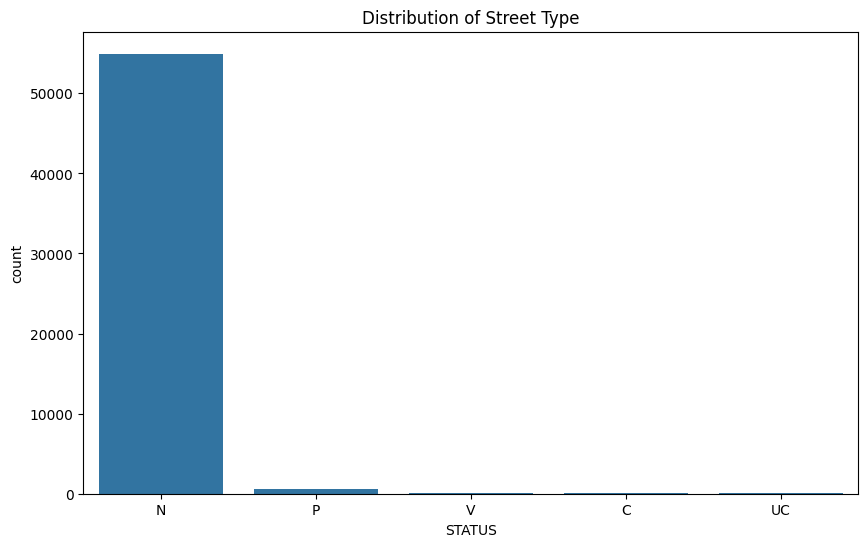

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='STATUS', data=street_data)
plt.title('Distribution of Street Type')
plt.show()

<div dir="rtl">نلاحظ أن معظم قيم العمود STATUS هي N (54949) وهذه القيمة عبارة عن NO STATUS، هذا يعني أن معظم الشوارع لا يوجد لها حالة معين، لذلك يمكننا تجاهل العمود بالكامل <div>

In [ ]:
street_data.drop(['STATUS'], axis=1, inplace=True)

In [ ]:
street_data.shape

(55747, 9)

In [ ]:
street_data.describe()

,LENGTH,SHAPE_LEN
count,55747.000000,55747.000000
mean,422.083657,422.083019
std,234.316376,234.314867
min,6.911068,6.911054
25%,312.710726,312.710723
50%,336.150284,336.149944
75%,652.164814,652.164807
max,8959.034042,8959.034057


<div dir="rtl">نلاحظ ان العمودين LENGTH و SHAPE_LENGTH قيمهما متساوية، لذلك يمكننا تجاهل أحدهما<div>

In [ ]:
street_data.drop(['SHAPE_LEN'], axis=1, inplace=True)

In [ ]:
street_data.shape

(55747, 8)

In [ ]:
street_data.describe(include='object')

,the_geom,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,TIERED,DIR_TRAVEL
count,55747,55293,55293,54493,55747,55747,55747
unique,55747,4,1649,22,11,2,3
top,MULTILINESTRING ((-87.63187018232667 41.780809...,W,WESTERN,AVE,4,N,B
freq,1,20941,391,25735,37506,55595,36455


In [ ]:
street_data.isnull().sum()

the_geom         0
PRE_DIR        454
STREET_NAM     454
STREET_TYP    1254
STREETNAME       0
CLASS            0
TIERED           0
DIR_TRAVEL       0
LENGTH           0
dtype: int64

<div dir="rtl"> لا يمكننا التنبؤ بأسماء الشوارع لذلك سنقوم بحذف الاسطر التي لا تحتوي على اسم الشارع <div>

In [ ]:
street_data.dropna(subset = ['STREET_NAM'], inplace=True)

In [ ]:
street_data[['STREET_NAM', 'PRE_DIR']].isnull().sum()

STREET_NAM    0
PRE_DIR       0
dtype: int64

<div dir="rtl">تم حذف ال missing values الموجودة في العمود PRE_DIR، هذا يعني أنهم موجودين بنفس الاسطر، وتم حذف اسم الشارع مع اتجاهه<div>

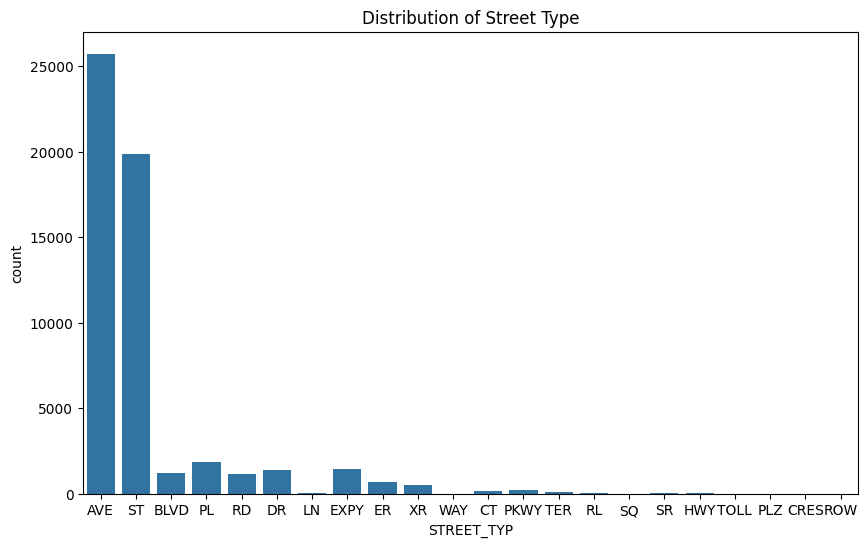

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='STREET_TYP', data=street_data)
plt.title('Distribution of Street Type')
plt.show()

<div dir="rtl">بما أن قيم العمود STREET_TYP هي catigorical بالإضافة الى أنها ليست ordinal سنستخدم قيمة ال mod لملء ال  missing values <div>

In [ ]:
top_freq_value = street_data['STREET_TYP'].mode()[0]
print(f'Most Frequent STREET_TYP value: {top_freq_value}')
street_data['STREET_TYP'].fillna(value=top_freq_value, inplace=True)

Most Frequent STREET_TYP value: AVE


In [ ]:
street_data['STREET_TYP'].isnull().sum()

0

In [ ]:
street_data.isnull().sum()

the_geom      0
PRE_DIR       0
STREET_NAM    0
STREET_TYP    0
STREETNAME    0
CLASS         0
TIERED        0
DIR_TRAVEL    0
LENGTH        0
dtype: int64

### [2] chicago-police-beat-boundries

In [ ]:
police_data

,the_geom,DISTRICT,SECTOR,BEAT,BEAT_NUM
0,MULTIPOLYGON (((-87.7047252651434 41.975774430...,17,1,1,1713
1,MULTIPOLYGON (((-87.83365455041093 41.97535481...,31,0,0,3100
2,MULTIPOLYGON (((-87.90684167275818 41.97656175...,16,5,5,1651
3,MULTIPOLYGON (((-87.64491798475646 41.96972709...,19,1,1,1914
4,MULTIPOLYGON (((-87.63724132684592 41.96598776...,19,1,1,1915
...,...,...,...,...,...
272,MULTIPOLYGON (((-87.58879491369598 41.78612259...,3,1,1,314
273,MULTIPOLYGON (((-87.67917077210467 41.78656347...,8,2,2,825
274,MULTIPOLYGON (((-87.6085394544142 41.785829320...,3,1,1,313
275,MULTIPOLYGON (((-87.69354469346045 41.78458419...,8,2,2,823


In [ ]:
police_data.columns

Index(['the_geom', 'DISTRICT', 'SECTOR', 'BEAT', 'BEAT_NUM'], dtype='object')

In [ ]:
info_df = pd.DataFrame()
info_df['missing_val'] = police_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / police_data.shape[0] * 100).round().astype(int)
info_df

,missing_val,missing_val_ratio
the_geom,0,0
DISTRICT,0,0
SECTOR,0,0
BEAT,0,0
BEAT_NUM,0,0


In [ ]:
police_data.nunique()

the_geom    277
DISTRICT     23
SECTOR        5
BEAT          5
BEAT_NUM    275
dtype: int64

<div dir="rtl">نلاحظ وجود قيم مكررة في العمود BEAT_NUM، لنكتشفها<div>

In [ ]:
police_data['BEAT_NUM'].value_counts()

BEAT_NUM
3100    3
2512    1
1813    1
2522    1
2525    1
       ..
1513    1
1115    1
212     1
213     1
312     1
Name: count, Length: 275, dtype: int64

In [ ]:
police_data[police_data['BEAT_NUM'] == 3100]

,the_geom,DISTRICT,SECTOR,BEAT,BEAT_NUM
1,MULTIPOLYGON (((-87.83365455041093 41.97535481...,31,0,0,3100
55,MULTIPOLYGON (((-87.82817787225841 41.98384222...,31,0,0,3100
263,MULTIPOLYGON (((-87.6912309678218 41.698985802...,31,0,0,3100


<div dir="rtl">القيم نفسها مكررة في الاسطر الثلاثة، لذلك سنقوم بحذف الاسطر المكررة<div>

In [ ]:
police_data.drop([55, 263], inplace = True)

In [ ]:
police_data.shape

(275, 5)

In [ ]:
police_data[['BEAT', 'SECTOR']].drop_duplicates()

,BEAT,SECTOR
0,1,1
1,0,0
2,5,5
6,3,3
8,2,2


<div dir="rtl">العمودين BEATو SECTOR فيهما نفس القيم، لذلك يمكننا الاستغناء عن أحدهما<div>

In [ ]:
police_data.drop('SECTOR',axis = 1, inplace = True)

In [ ]:
police_data.dtypes

the_geom    object
DISTRICT     int64
BEAT         int64
BEAT_NUM     int64
dtype: object

In [ ]:
police_data.describe()

,DISTRICT,BEAT,BEAT_NUM
count,275.000000,275.000000,275.000000
mean,11.985455,2.043636,1221.680000
std,7.075697,0.911156,707.742272
min,1.000000,0.000000,111.000000
25%,6.000000,1.000000,632.500000
50%,11.000000,2.000000,1125.000000
75%,18.000000,3.000000,1811.500000
max,31.000000,5.000000,3100.000000


In [ ]:
police_data[["DISTRICT", "BEAT"]].groupby(['BEAT']).count()

,DISTRICT
BEAT,
0,1
1,90
2,90
3,89
5,5


<div dir="rtl">الدوائر في العمود DISTRICT متوزعة بشكل متساوي بين المناطق  1, 2, 3<div>

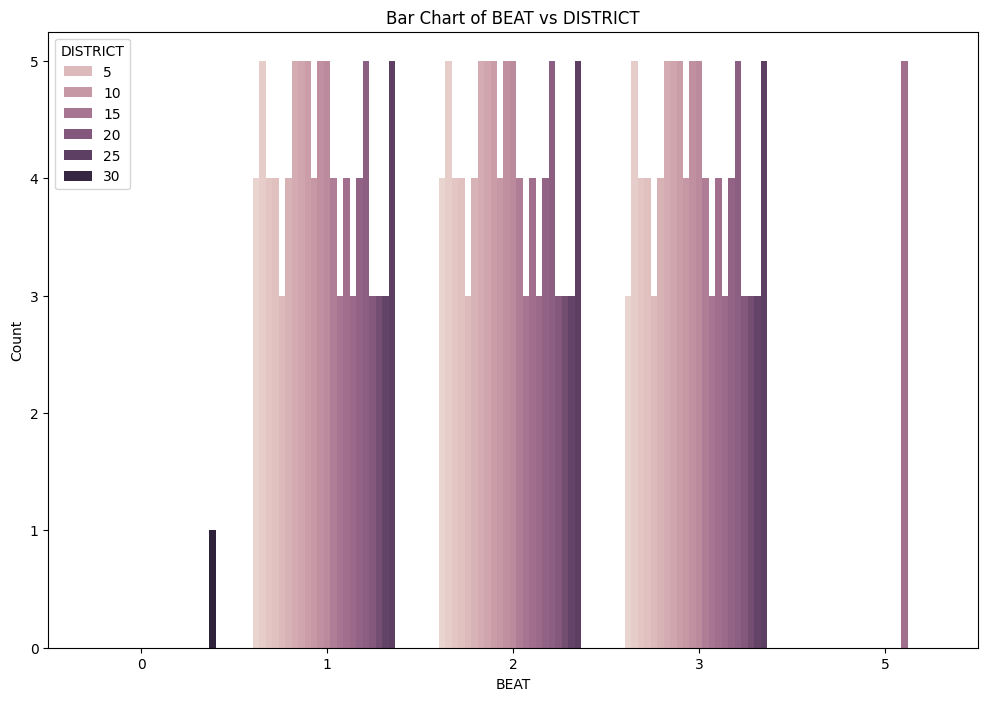

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=police_data, x='BEAT', hue='DISTRICT')
plt.title('Bar Chart of BEAT vs DISTRICT')
plt.xlabel('BEAT')
plt.ylabel('Count')
plt.legend(title='DISTRICT')
plt.show()

### [3] chicago-CBD-boundary

In [ ]:
cbd_data

,the_geom,OBJECTID,SUM_AREA,NAME,AREA,LEN,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.62405822532047 41.90406015...,1,1.045633e+08,Central Business District,0,0,1.122806e+08,61725.295967


<div dir="rtl">من الواضح أنه يمكن تجاهل الأعمدة التالية OBJECTID,AREA, LEN<div>

In [ ]:
cbd_data.drop(['OBJECTID', 'AREA', 'LEN'], axis = 1, inplace = True)

### [4] traffic-crashes-vehicles

In [ ]:
vehicles_data = origin_vehicles_data.copy()
vehicles_data

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,LIC_PLATE_STATE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,1634931.0,NaN,NISSAN,SENTRA,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,1634978.0,NaN,CHRYSLER,SEBRING,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,1634948.0,NaN,SUBARU,OUTBACK,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,1637401.0,NaN,TOYOTA,RAV4,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,2,DRIVER,1637408.0,NaN,SUBARU,OUTBACK,OK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680887,1792357,50f1ee1cffabbc3f4546c5b8fa0f74a64c3604711b2391...,03/31/2024 01:03:00 AM,2,DRIVER,1706983.0,NaN,CHEVROLET,MALIBU,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680888,1792358,50f1ee1cffabbc3f4546c5b8fa0f74a64c3604711b2391...,03/31/2024 01:03:00 AM,1,DRIVER,1706984.0,NaN,DODGE,CARAVAN,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680889,1792603,8442b8de4eb4519aad542b1bc538f98617523287971452...,03/31/2024 01:15:00 PM,1,DRIVER,1707226.0,NaN,UNKNOWN,OTHER (EXPLAIN IN NARRATIVE),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680890,1792604,8442b8de4eb4519aad542b1bc538f98617523287971452...,03/31/2024 01:15:00 PM,2,PARKED,1707223.0,NaN,GENERAL MOTORS CORPORATION (GMC),TERRAIN,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vehicles_data.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE', 'MODEL',
       'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 'TOWED_I', 'FIRE_I',
       'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY', 'TOWED_TO',
       'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 'AREA_04_I',
       'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I',
       'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_WIDTH', 'TRAILER2_

In [ ]:
vehicles_data.shape

(1680892, 70)

In [ ]:
info_df = pd.DataFrame()
info_df['missing_val'] = vehicles_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / vehicles_data.shape[0] * 100).round().astype(int)
info_df

,missing_val,missing_val_ratio
CRASH_UNIT_ID,0,0
CRASH_RECORD_ID,0,0
CRASH_DATE,0,0
UNIT_NO,0,0
UNIT_TYPE,2150,0
...,...,...
CARGO_BODY_TYPE,1667351,99
LOAD_TYPE,1667946,99
HAZMAT_OUT_OF_SERVICE_I,1669111,99
MCS_OUT_OF_SERVICE_I,1668862,99


نلاحظ أن الاعمدة التالية CMRC_VEH_I , OVEHICLE_YEAR , ETOWED_I , FIRE_I , EXCEED_SPEED_LIMIT_I ,TOWED_BY,TOWED_TO,AREA_00_I,AREA_01_I,AREA_02_I,AREA_03_I,AREA_04_I,AREA_05_I,AREA_06_I,AREA_07_I,AREA_08_I,AREA_09_I,AREA_10_I,AREA_11_I,AREA_12_I,AREA_99_I,CMV_ID,USDOT_NO,CCMC_NO ,ILCC_NO,COMMERCIAL_SRC,GVWR ,CARRIER_NAME , CARRIER_STATE ,CARRIER_CITY ,HAZMAT_PLACARDS_I ,HAZMAT_NAME ,UN_NO, HAZMAT_PRESENT_I ,HAZMAT_REPORT_I,HAZMAT_REPORT_NO ,MCS_REPORT_I ,MCS_REPORT_NO,HAZMAT_VIO_CAUSE_CRASH_I,MCS_VIO_CAUSE_CRASH_I,IDOT_PERMIT_NO ,WIDE_LOAD_I,TRAILER1_WIDTH ,TRAILER2_WIDTH,TRAILER1_LENGTH ,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT ,VEHICLE_CONFIG ,CARGO_BODY_TYPE,LOAD_TYPE ,HAZMAT_OUT_OF_SERVICE_I ,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS تحتوي على نسب عالية جدا (أكثر من النصف) من ال missing value لذلك سنقوم بحذفها

In [ ]:
try:
    vehicles_data.drop(['CMRC_VEH_I', 'FIRE_I', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY', 'TOWED_TO',
                       'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 'AREA_04_I', 'AREA_05_I',
                       'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I', 'AREA_10_I', 'AREA_11_I',
                       'AREA_12_I', 'AREA_99_I', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
                       'CARRIER_NAME', 'CARRIER_STATE', 'CARRIER_CITY', 'HAZMAT_PLACARDS_I',
                       'HAZMAT_NAME', 'UN_NO', 'HAZMAT_REPORT_I', 'MCS_REPORT_I',
                       'HAZMAT_VIO_CAUSE_CRASH_I', 'MCS_VIO_CAUSE_CRASH_I', 'WIDE_LOAD_I',
                       'TRAILER2_WIDTH', 'TRAILER1_LENGTH', 'TRAILER2_LENGTH',
                       'TOTAL_VEHICLE_LENGTH', 'VEHICLE_CONFIG', 'CARGO_BODY_TYPE', 'LOAD_TYPE',
                       'HAZMAT_OUT_OF_SERVICE_I', 'MCS_OUT_OF_SERVICE_I','TOWED_I','COMMERCIAL_SRC','GVWR',
                       'HAZMAT_PRESENT_I','HAZMAT_REPORT_NO','MCS_REPORT_NO','IDOT_PERMIT_NO','TRAILER1_WIDTH',
                       'AXLE_CNT','HAZMAT_CLASS'],
                      axis=1, inplace=True)
except KeyError as e:
    print(f"Error: {e}")
    print("Some column names were not found in the DataFrame. Please check the column names and try again.")

In [ ]:
vehicles_data.shape

(1680892, 17)

In [ ]:
info_df = pd.DataFrame()
info_df['missing_val'] = vehicles_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / vehicles_data.shape[0] * 100).round().astype(int)
info_df

,missing_val,missing_val_ratio
CRASH_UNIT_ID,0,0
CRASH_RECORD_ID,0,0
CRASH_DATE,0,0
UNIT_NO,0,0
UNIT_TYPE,2150,0
VEHICLE_ID,38473,2
MAKE,38478,2
MODEL,38623,2
LIC_PLATE_STATE,188917,11
VEHICLE_YEAR,301958,18


In [ ]:
vehicles_data.dtypes

CRASH_UNIT_ID            int64
CRASH_RECORD_ID         object
CRASH_DATE              object
UNIT_NO                  int64
UNIT_TYPE               object
VEHICLE_ID             float64
MAKE                    object
MODEL                   object
LIC_PLATE_STATE         object
VEHICLE_YEAR           float64
VEHICLE_DEFECT          object
VEHICLE_TYPE            object
VEHICLE_USE             object
TRAVEL_DIRECTION        object
MANEUVER                object
OCCUPANT_CNT           float64
FIRST_CONTACT_POINT     object
dtype: object

In [ ]:
vehicles_data.nunique()

CRASH_UNIT_ID          1680892
CRASH_RECORD_ID         823957
CRASH_DATE              541221
UNIT_NO                     20
UNIT_TYPE                    9
VEHICLE_ID             1642419
MAKE                      1334
MODEL                     2714
LIC_PLATE_STATE             52
VEHICLE_YEAR               230
VEHICLE_DEFECT              17
VEHICLE_TYPE                22
VEHICLE_USE                 25
TRAVEL_DIRECTION             9
MANEUVER                    28
OCCUPANT_CNT                46
FIRST_CONTACT_POINT         23
dtype: int64

In [ ]:
vehicles_data[['VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER','OCCUPANT_CNT','VEHICLE_ID']].describe()

,OCCUPANT_CNT,VEHICLE_ID
count,1.642419e+06,1.642419e+06
mean,1.078731e+00,8.549934e+05
std,7.821784e-01,4.937966e+05
min,0.000000e+00,2.000000e+00
25%,1.000000e+00,4.277905e+05
50%,1.000000e+00,8.534420e+05
75%,1.000000e+00,1.281884e+06
max,9.900000e+01,1.712856e+06


In [ ]:
vehicles_data.dropna(subset = ['VEHICLE_DEFECT'], inplace=True)

In [ ]:
vehicles_data[['VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER','OCCUPANT_CNT','VEHICLE_ID']].isnull().sum()

VEHICLE_DEFECT      0
VEHICLE_TYPE        0
VEHICLE_USE         0
TRAVEL_DIRECTION    0
MANEUVER            0
OCCUPANT_CNT        0
VEHICLE_ID          0
dtype: int64

In [ ]:
vehicles_data['MODEL'].value_counts()

MODEL
UNKNOWN                                               180803
OTHER (EXPLAIN IN NARRATIVE)                          148915
CAMRY                                                  52476
COROLLA                                                32961
CIVIC                                                  31443
                                                       ...  
FEY, FRANK & CO.                                           1
MCNAMEE COACH CORP.                                        1
ESCORT TRAILER CORP., SEATTLE, WA                          1
INTERNATIONAL MOBILE HOMES OF CALIFORNIA                   1
HATFIELD WELDING & TRAILER SALES, INC. MT.PLEASANT         1
Name: count, Length: 2714, dtype: int64

In [ ]:
vehicles_data['MAKE'].value_counts()

MAKE
CHEVROLET                                             190651
UNKNOWN                                               164018
FORD                                                  163720
NISSAN                                                133201
HONDA                                                 120429
                                                       ...  
CENTREVILLE TRAILER                                        1
LINDE                                                      1
MCN MOBILE HOMES CORPORATION                               1
DELTA HOMES CORPORATION                                    1
HATFIELD WELDING & TRAILER SALES, INC. MT.PLEASANT         1
Name: count, Length: 1334, dtype: int64

In [ ]:
vehicles_data['UNIT_TYPE'].value_counts()

UNIT_TYPE
DRIVER                 1406682
PARKED                  221527
DRIVERLESS               13773
DISABLED VEHICLE           249
NON-CONTACT VEHICLE        169
Name: count, dtype: int64

In [ ]:
 vehicles_data['VEHICLE_DEFECT'].value_counts()

VEHICLE_DEFECT
NONE                888141
UNKNOWN             736724
OTHER                 9318
BRAKES                5155
TIRES                  830
STEERING               746
WHEELS                 418
SUSPENSION             268
FUEL SYSTEM            233
ENGINE/MOTOR           210
WINDOWS                109
LIGHTS                 101
CARGO                   57
SIGNALS                 42
RESTRAINT SYSTEM        25
TRAILER COUPLING        23
EXHAUST                 19
Name: count, dtype: int64

In [ ]:
vehicles_data[vehicles_data['MODEL']=='RDX']

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
61727,10592,61f447045cbfc8383a596b0bbf9d4f67a152727a1f4977...,11/04/2015 05:20:00 PM,2,DRIVER,10138.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),RDX,IL,2013.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,E,SLOW/STOP IN TRAFFIC,1.0,REAR
62335,105978,c37ef161b4ce3f622fc2dc6f9f98f38e0912a4c5b90455...,12/10/2016 09:00:00 PM,2,PARKED,103830.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),RDX,IL,2015.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,S,PARKED,0.0,FRONT-LEFT
129895,112486,5f44ac6091768e58a16a98d914197a52e737d96f21cc26...,12/28/2016 03:05:00 PM,1,DRIVER,111347.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),RDX,IL,NaN,UNKNOWN,PASSENGER,UNKNOWN/NA,W,UNKNOWN/NA,1.0,FRONT
189954,118263,1657cccdf0f36bece00e2b998bc35b3700c6356a309295...,01/17/2017 03:00:00 PM,2,DRIVER,118052.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),RDX,IL,2016.0,UNKNOWN,SPORT UTILITY VEHICLE (SUV),UNKNOWN/NA,E,STRAIGHT AHEAD,1.0,REAR
197072,118942,9dc3be6b5a9414a18a22e3c67cbdc541a28828fba4666d...,01/19/2017 06:36:00 PM,2,DRIVER,118844.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),RDX,IL,2014.0,NONE,SPORT UTILITY VEHICLE (SUV),UNKNOWN/NA,S,SLOW/STOP - LOAD/UNLOAD,2.0,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484065,857437,50814dc687684ee9b53bdac40b3226e448a150169ae26e...,03/07/2020 10:55:00 AM,2,DRIVER,813613.0,NaN,RDX,IL,2014.0,UNKNOWN,PASSENGER,PERSONAL,E,SLOW/STOP IN TRAFFIC,1.0,REAR
1530558,9023,862eac317a07839a91cf98879536f796ec94e7d4f93c63...,10/25/2015 10:30:00 AM,1,DRIVER,8610.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),RDX,IL,2015.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,W,CHANGING LANES,1.0,FRONT-LEFT
1614563,98358,e501fa4f352c1101175c84fa9f6f9a4500bbe3e90a7960...,11/08/2016 09:15:00 AM,1,DRIVER,95056.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),RDX,IL,2016.0,NONE,PASSENGER,PERSONAL,E,AVOIDING VEHICLES/OBJECTS,2.0,FRONT-LEFT
1619780,98864,a28a9a074d18aa6a4e6abf2bbb4250b6b13c76cf8f04cc...,11/18/2016 07:50:00 PM,2,DRIVER,95544.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),RDX,NaN,2016.0,NONE,PASSENGER,PERSONAL,UNKNOWN,OTHER,1.0,REAR


In [ ]:
vehicles_data[vehicles_data['MAKE'].isnull()]

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
1484065,857437,50814dc687684ee9b53bdac40b3226e448a150169ae26e...,03/07/2020 10:55:00 AM,2,DRIVER,813613.0,NaN,RDX,IL,2014.0,UNKNOWN,PASSENGER,PERSONAL,E,SLOW/STOP IN TRAFFIC,1.0,REAR
1484356,857707,d9d33f7ce553831bca6d5d6f9927104587f61d0e56f9af...,03/07/2020 12:30:00 PM,1,DRIVER,813873.0,NaN,NaN,IL,2010.0,UNKNOWN,PASSENGER,UNKNOWN/NA,N,PASSING/OVERTAKING,1.0,FRONT-RIGHT-CORNER
1484501,857847,4d9cbcbaf92e5886603724cc35b16d5912cb32d940c3c4...,03/08/2020 12:30:00 PM,2,DRIVER,814010.0,NaN,TL,IL,2004.0,NONE,PASSENGER,PERSONAL,E,SLOW/STOP IN TRAFFIC,1.0,FRONT-LEFT-CORNER
1484771,858098,b1376f7bf662e33bea2fd41f6374cbc0f3c3b00ac8f130...,03/08/2020 05:12:00 PM,1,DRIVER,814255.0,NaN,MDX,IL,2014.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,UNKNOWN,STRAIGHT AHEAD,2.0,OTHER
1485973,859240,424b8aafb45ad5b604152954e4b543aa2d529d7ed62f8e...,03/10/2020 11:40:00 AM,2,DRIVER,815338.0,NaN,TSX,IL,2007.0,NONE,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,1.0,SIDE-RIGHT-FRONT


In [ ]:
vehicles_data.loc[1484065, 'MAKE'] = 'ACURA (DIV. OF AMERICAN HONDA MOTOR CO.)'

In [ ]:
vehicles_data[vehicles_data['MODEL']=='TL']

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
4136,100387,d96f2ed647e12eb9036731b742dd08733d855f0620456e...,11/22/2016 10:04:00 PM,1,DRIVER,97204.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TL,IL,NaN,UNKNOWN,PASSENGER,UNKNOWN/NA,S,BACKING,1.0,REAR
5951,100562,205832db89cbfd93a246f9225c2532fed7b37aa62090a9...,11/23/2016 06:40:00 PM,2,DRIVER,97427.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TL,IL,2005.0,NONE,PASSENGER,PERSONAL,N,TURNING LEFT,1.0,FRONT-LEFT
12156,101159,c72f6c209d45627979c6f0533d972162202e64e9494257...,11/26/2016 01:45:00 PM,2,PARKED,98177.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TL,IL,2003.0,NONE,PASSENGER,PERSONAL,UNKNOWN,PARKED,0.0,REAR-LEFT
22586,102168,e198d6316d222c05416c0f80731d560aaad5664698bfde...,11/29/2016 06:40:00 AM,1,DRIVER,99384.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TL,IL,1999.0,NONE,PASSENGER,PERSONAL,W,TURNING LEFT,1.0,FRONT-LEFT
25317,102437,d335dca19529268f8242a57252477174ecef5fd274abf3...,11/30/2016 12:40:00 PM,2,PARKED,99704.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TL,IL,2015.0,NONE,PASSENGER,NOT IN USE,E,PARKED,0.0,FRONT-LEFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557301,92808,775e539f907c9e8e75e42c500515d5e298155c834e41ec...,11/01/2016 11:30:00 AM,2,DRIVER,89698.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TL,IL,NaN,NONE,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,1.0,REAR
1557698,92845,aeac43a030d3e18a2ff8b190aa1021ead4d5db27c9c620...,11/01/2016 07:35:00 AM,2,DRIVER,89737.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TL,IL,1999.0,NONE,PASSENGER,PERSONAL,S,SLOW/STOP IN TRAFFIC,1.0,REAR
1590384,96013,56eb653b413f36c55dc7c9e85a64ef566512c71db0e820...,11/09/2016 09:35:00 PM,1,DRIVER,92802.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TL,IL,1999.0,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,FRONT
1594485,96412,ad619c3f0a63a52c4ca9c61841ee177b5f46f8016ed0aa...,11/02/2016 07:00:00 AM,2,PARKED,93179.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TL,IL,2014.0,NONE,PASSENGER,PERSONAL,E,PARKED,0.0,REAR-LEFT


In [ ]:
vehicles_data.loc[1484501, 'MAKE'] = 'ACURA (DIV. OF AMERICAN HONDA MOTOR CO.)'

In [ ]:
vehicles_data[vehicles_data['MODEL']=='MDX']

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
34872,10336,81e2082f5b8ccb6f3a27f140351c83e27c9dc6196db4e7...,11/01/2015 12:30:00 AM,1,DRIVER,9888.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),MDX,IL,2010.0,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,FRONT-RIGHT
49674,104771,ed3c2e8cac8d015eea375aa526eeea8c3f8239c10d99d3...,12/07/2016 07:45:00 AM,1,DRIVER,102443.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),MDX,WI,2007.0,NONE,PASSENGER,UNKNOWN/NA,W,STRAIGHT AHEAD,1.0,UNKNOWN
77303,107422,d053848e6fa347d4b7e01616cabf9720fa92aa4711e651...,12/14/2016 06:00:00 PM,2,DRIVER,105478.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),MDX,IL,2011.0,UNKNOWN,SPORT UTILITY VEHICLE (SUV),PERSONAL,W,SLOW/STOP IN TRAFFIC,1.0,REAR
91886,108830,dd8faf60e0cf707a7fb0faaf713b2d8a2222777d6bea31...,12/17/2016 04:00:00 PM,2,DRIVER,107095.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),MDX,IL,2010.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,W,STRAIGHT AHEAD,1.0,FRONT-RIGHT
92967,108933,059fce032fb4f1a8385e53f137faa2755242cb8b071449...,12/18/2016 01:30:00 AM,2,DRIVER,107217.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),MDX,IL,2014.0,UNKNOWN,OTHER,UNKNOWN/NA,W,UNKNOWN/NA,2.0,REAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518958,8909,b78d132647955bf951fde7146f305d4c63c2649f884cee...,10/26/2015 08:00:00 AM,2,DRIVER,8503.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),MDX,IL,2003.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,S,TURNING LEFT,4.0,REAR-RIGHT
1520073,89200,c0871a45fa3b0ea13def4928b8a0a285445e72f14f7d88...,10/22/2016 06:30:00 PM,2,DRIVER,86221.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),MDX,IL,2009.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,N,SLOW/STOP IN TRAFFIC,1.0,REAR
1549207,9203,5488b36182bc9f77a477be4c54030f0a30415d0f7ac995...,10/28/2015 12:50:00 PM,2,DRIVER,8792.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),MDX,IL,2005.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,W,STRAIGHT AHEAD,1.0,SIDE-RIGHT
1571689,94195,52aa5fe96cd77bc804258be208c50a649db1b370d5c70b...,11/04/2016 12:40:00 PM,2,DRIVER,91037.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),MDX,IL,2007.0,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,REAR-LEFT


In [ ]:
vehicles_data.loc[1484771, 'MAKE'] = 'ACURA (DIV. OF AMERICAN HONDA MOTOR CO.)'

In [ ]:
vehicles_data[vehicles_data['MODEL']=='TSX']

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
5731,100541,4ab094722c40b059ad999d3daff3e5943fb13f0216d93d...,11/23/2016 07:07:00 PM,2,DRIVER,97381.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TSX,IL,2004.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,1.0,REAR
12291,101172,666ce074eb7b4d595e0f0097eb54cbeccf555ed17bf32f...,11/26/2016 12:55:00 PM,1,DRIVER,98185.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TSX,NaN,2004.0,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,UNKNOWN
97306,10935,961630ba39387d7ed9baddfc3b2b00506968f015ab1511...,11/06/2015 12:01:00 AM,2,PARKED,10475.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TSX,IL,2008.0,NONE,PASSENGER,NOT IN USE,S,PARKED,0.0,SIDE-LEFT
176506,116984,94ce3cb5d7b2d0ebcf2af2643b5cf9df0c8789f8f72b76...,01/13/2017 11:00:00 AM,2,PARKED,116573.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TSX,IL,2009.0,NONE,PASSENGER,PERSONAL,S,PARKED,0.0,SIDE-RIGHT
269622,12587,375cb097c78a9038343d093711867c342042f890e13a1c...,11/15/2015 03:35:00 PM,2,DRIVER,12077.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TSX,NaN,2007.0,NONE,PASSENGER,PERSONAL,S,SLOW/STOP IN TRAFFIC,1.0,REAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488864,862,2736150d4435ac2b4c9d51ced1b354a5eee7322770e92f...,08/30/2015 04:30:00 PM,2,DRIVER,823.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TSX,IL,2009.0,UNKNOWN,PASSENGER,PERSONAL,W,TURNING LEFT,1.0,SIDE-LEFT
1530879,90261,8513007cb092c5010118799f14b812bbc56c312e01a15a...,10/25/2016 07:20:00 AM,2,DRIVER,87236.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TSX,NaN,2009.0,NONE,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,1.0,SIDE-LEFT
1569196,93958,a9c6f6c83431915a2cae3f2dc7888df56297ea37c46c20...,11/04/2016 08:35:00 AM,1,DRIVER,90812.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TSX,IL,2006.0,NONE,PASSENGER,PERSONAL,E,TURNING LEFT,1.0,FRONT
1608154,97737,8cb2f1849d828689d9dd7277d8af5d9e7263ec8b230909...,11/15/2016 05:00:00 PM,2,PARKED,94459.0,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),TSX,IL,2004.0,NONE,PASSENGER,NOT IN USE,W,PARKED,0.0,FRONT


In [ ]:
vehicles_data.loc[1485973, 'MAKE'] = 'ACURA (DIV. OF AMERICAN HONDA MOTOR CO.)'

In [ ]:
vehicles_data.loc[1484356, 'MAKE'] = 'ACURA (DIV. OF AMERICAN HONDA MOTOR CO.)'

In [ ]:
vehicles_data[vehicles_data['MAKE'].isnull()]

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT


<div dir="rtl">تم تحول القيم missing_val  من عمود MAKE اربع قيم الى ACURA (DIV. OF AMERICAN HONDA MOTOR CO.)
 <div>

In [ ]:
vehicles_data['VEHICLE_YEAR'] = vehicles_data['VEHICLE_YEAR'].astype(str)
# حولنا العمود VEHICLE_YEAR الى object لأنه عبارة عن تاريخ
vehicles_data.dtypes

CRASH_UNIT_ID            int64
CRASH_RECORD_ID         object
CRASH_DATE              object
UNIT_NO                  int64
UNIT_TYPE               object
VEHICLE_ID             float64
MAKE                    object
MODEL                   object
LIC_PLATE_STATE         object
VEHICLE_YEAR            object
VEHICLE_DEFECT          object
VEHICLE_TYPE            object
VEHICLE_USE             object
TRAVEL_DIRECTION        object
MANEUVER                object
OCCUPANT_CNT           float64
FIRST_CONTACT_POINT     object
dtype: object

In [ ]:
vehicles_data[vehicles_data['UNIT_TYPE'].isnull()]

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
219835,1211191,c7f32936c09c6427781711b678ebeeb086dc9f1311232a...,10/23/2021 10:48:00 AM,1,NaN,1149260.0,INFINITI,OTHER (EXPLAIN IN NARRATIVE),NaN,nan,UNKNOWN,PASSENGER,UNKNOWN/NA,E,STRAIGHT AHEAD,2.0,NaN
230753,1221639,ddac463196e9dd543460aed5fb0aad72f4e6e41d261566...,11/06/2021 06:40:00 AM,1,NaN,1159254.0,VOLKSWAGEN,PASSAT,IL,2021.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,1.0,NaN
231387,1222234,8ff96a9a936464b8615a5b6d096fe7690f4a23108a29c0...,11/07/2021 02:51:00 AM,1,NaN,1159816.0,UNKNOWN,MOTORIZED,NaN,nan,UNKNOWN,PASSENGER,UNKNOWN/NA,N,AVOIDING VEHICLES/OBJECTS,1.0,UNKNOWN
879852,27355,2caa480227c4eb7f223ffffcb96987ca2448dfdc69ae0f...,02/06/2016 02:00:00 PM,3,NaN,26407.0,UNKNOWN,UNKNOWN,XX,nan,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,UNKNOWN,UNKNOWN/NA,0.0,NaN
902377,295141,2e551a704a4edf970d73a08c1f57f47180e91df32b57a0...,01/02/2018 01:30:00 PM,1,NaN,286231.0,LEXUS,RX350,IL,nan,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,1.0,NaN
1018087,407072,12816265b26339e7f31d5a78662ec928b4497b58693a07...,06/11/2018 08:15:00 AM,1,NaN,391356.0,FREIGHTLINER CORP.,UNKNOWN,IL,nan,NONE,BUS OVER 15 PASS.,CTA,N,STRAIGHT AHEAD,1.0,NaN
1140284,525323,caa1e43696793c5ecbdd5b8fed25f6294e3880667d725f...,11/19/2018 10:40:00 AM,1,NaN,501769.0,VOLVO,VOLVO,IL,nan,NONE,PASSENGER,NOT IN USE,W,NEGOTIATING A CURVE,1.0,FRONT-RIGHT
1153533,538227,b2e3f2cec171885d95c905babc7c290441345c4fa9dc7b...,12/08/2018 02:25:00 AM,1,NaN,513770.0,CHRYSLER,UNKNOWN,IL,2009.0,NONE,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,2.0,NaN
1164611,54896,892954af2137e9d2bab249e010acd1f902d759153a863e...,06/22/2016 08:36:00 PM,2,NaN,53328.0,HONDA,Odyssey (minivan),IL,2005.0,NONE,PASSENGER,PERSONAL,E,STRAIGHT AHEAD,1.0,TOTAL (ALL AREAS)
1266014,647823,03b3c3b04428192ed992760d50dcd1e45c5be3e67914a2...,05/16/2019 05:45:00 AM,1,NaN,616859.0,CHEVROLET,CAVALIER,IL,2000.0,NONE,PASSENGER,NOT IN USE,S,PARKED,0.0,REAR-LEFT


<div dir="rtl">معالجة القيم يلي فيها nan عددها       263485<div>

In [ ]:
vehicles_data[vehicles_data['VEHICLE_YEAR'].isnull()]

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT


In [ ]:
vehicles_data['VEHICLE_YEAR'] = vehicles_data['VEHICLE_YEAR'].interpolate()

In [ ]:
vehicles_data['VEHICLE_YEAR'].value_counts().sort_index()

VEHICLE_YEAR
1900.0       357
1901.0        27
1902.0         1
1905.0         1
1909.0         1
           ...  
8609.0         1
9418.0         1
9900.0         3
9999.0       398
nan       263485
Name: count, Length: 231, dtype: int64

In [ ]:
vehicles_data['VEHICLE_YEAR'].value_counts().loc[lambda x: x.index > "2024.0"].sort_index().head(60)

VEHICLE_YEAR
2025.0    14
2026.0     6
2027.0     3
2028.0     9
2029.0     7
2030.0     3
2031.0     4
2032.0     2
2033.0    11
2034.0     1
2040.0     3
2041.0     3
2044.0     3
2045.0     2
2047.0     5
2048.0     2
2049.0     2
2051.0     1
2054.0     1
2055.0     7
2066.0    10
2071.0     1
2077.0     5
2078.0     1
2079.0     1
2083.0     1
2088.0    19
2091.0     1
2095.0     1
2096.0     1
2097.0     1
2098.0     1
2099.0    11
2100.0    10
2101.0     1
2102.0    10
2103.0    33
2104.0    32
2105.0    23
2106.0    25
2107.0    25
2108.0    20
2109.0     7
2110.0     6
2111.0     2
2112.0     3
2113.0     1
2114.0     1
2115.0     2
2116.0     2
2117.0     1
2118.0     2
2121.0    11
2140.0     1
2201.0     9
2202.0    11
2203.0     8
2204.0    25
2205.0    17
2206.0    15
Name: count, dtype: int64

In [ ]:
vehicles_data['VEHICLE_YEAR'].value_counts().loc[lambda x: x.index > "2024.0"].sort_index().tail(60)

VEHICLE_YEAR
2918.0         8
2919.0         6
2920.0         1
2923.0         3
2929.0         1
2992.0         1
2994.0         1
2996.0         1
2997.0         2
2998.0         2
2999.0         1
3001.0         2
3002.0         1
3003.0         6
3004.0         1
3006.0         1
3007.0         1
3009.0         1
3011.0         3
3012.0         2
3013.0        15
3014.0         1
3016.0         3
3017.0         5
3018.0         2
3019.0         1
3022.0         1
3023.0         2
3027.0         1
3029.0         1
3122.0         1
3217.0         1
4449.0         1
5004.0         1
5005.0         1
5007.0         2
5011.0         1
5012.0         1
5015.0         3
5017.0         1
5084.0         1
5157.0         1
5383.0         1
5555.0         1
6008.0         1
6016.0         1
6043.0         1
6414.0         1
7007.0         1
7372.0         1
7604.0         1
7999.0         1
8001.0         1
8007.0         1
8324.0         1
8609.0         1
9418.0         1
9900.0         3
9

In [ ]:
vehicles_data['VEHICLE_YEAR'].value_counts().loc[lambda x: x.index > '2024.0'].head(60)

VEHICLE_YEAR
nan       263485
9999.0       398
2103.0        33
2104.0        32
2106.0        25
2204.0        25
2107.0        25
2207.0        24
2105.0        23
2108.0        20
2088.0        19
2205.0        17
2206.0        15
3013.0        15
2913.0        14
2915.0        14
2025.0        14
2917.0        12
2914.0        12
2099.0        11
2121.0        11
2916.0        11
2202.0        11
2033.0        11
2102.0        10
2209.0        10
2066.0        10
2208.0        10
2100.0        10
2028.0         9
2201.0         9
2918.0         8
2203.0         8
2029.0         7
2055.0         7
2109.0         7
3003.0         6
2110.0         6
2026.0         6
2919.0         6
2912.0         5
2047.0         5
2222.0         5
2077.0         5
3017.0         5
2031.0         4
2027.0         3
2040.0         3
2041.0         3
2044.0         3
5015.0         3
2923.0         3
9900.0         3
2910.0         3
2112.0         3
3016.0         3
3011.0         3
2030.0         3
2

تم التحول القيم 9999 الى 1999 عددهن 398

In [ ]:
vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "9999.0", 'VEHICLE_YEAR'] = "1999.0"

In [ ]:
vehicles_data[vehicles_data['VEHICLE_YEAR'] == "1999.0"]

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
100,100,e73b35bd7651b0c6693162bee0666db159b28901437009...,07/31/2015 05:50:00 PM,1,DRIVER,96.0,NISSAN,Pathfinder,IL,1999.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,E,STRAIGHT AHEAD,1.0,FRONT
215,1000102,7670c8ae5853cf3c2146eedbe6c631ef00acb20dbd77dd...,11/25/2020 10:51:00 PM,2,PARKED,947750.0,DODGE,OTHER (EXPLAIN IN NARRATIVE),IL,1999.0,UNKNOWN,PICKUP,UNKNOWN/NA,N,PARKED,0.0,SIDE-LEFT
341,1000225,68e83f1be0462b0016b836064366924dcf27d5f6cdb548...,11/26/2020 08:00:00 AM,2,PARKED,947874.0,FORD,EXPLORER,IL,1999.0,UNKNOWN,SPORT UTILITY VEHICLE (SUV),NOT IN USE,UNKNOWN,PARKED,0.0,REAR-LEFT-CORNER
509,100038,6d5d4ec309b43a2cd51c9823d2439cf36a1037ec72e9db...,11/22/2016 06:00:00 PM,2,DRIVER,96816.0,HONDA,ACCORD,IL,1999.0,NONE,PASSENGER,PERSONAL,S,STARTING IN TRAFFIC,1.0,SIDE-RIGHT
536,1000405,ac1678a64a1c5a8005045fea4b4b9369b9bcad643e9af7...,11/26/2020 07:05:00 PM,1,DRIVER,948048.0,PONTIAC,SUNFIRE,IL,1999.0,NONE,PASSENGER,PERSONAL,NW,STRAIGHT AHEAD,3.0,FRONT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680056,1797937,7bc4968185ce5a2da88bd2cfb76e42e7950f246ba53ffb...,04/15/2024 10:50:00 AM,1,DRIVER,1712315.0,FORD,EXPLORER,IL,1999.0,UNKNOWN,SPORT UTILITY VEHICLE (SUV),UNKNOWN/NA,NE,STRAIGHT AHEAD,1.0,SIDE-LEFT
1680313,1798237,d48f95395940376e938ebe496905c87fb7eeedae15d972...,04/15/2024 04:24:00 PM,1,DRIVER,1712618.0,MERCURY,GRAND MARQUIS,IL,1999.0,UNKNOWN,PASSENGER,PERSONAL,NE,TURNING RIGHT,1.0,FRONT-RIGHT-CORNER
1680317,1798241,f8b45081e968503d7fc9748790c444b3a12d04d177eae5...,04/15/2024 04:03:00 PM,1,DRIVER,1712616.0,HONDA,CR-V,IL,1999.0,UNKNOWN,PASSENGER,UNKNOWN/NA,W,STRAIGHT AHEAD,1.0,FRONT
1680463,1798397,bb5f70e30d0e88509e9eda2fa546c1690f3f0d84d5a446...,04/15/2024 06:30:00 PM,2,PARKED,1712763.0,TOYOTA,OTHER (EXPLAIN IN NARRATIVE),IL,1999.0,NONE,PASSENGER,PERSONAL,UNKNOWN,PARKED,0.0,FRONT-LEFT-CORNER


تم تحول القيم اكثر تكرار الى اعوام معروفة
والباقي القيم تم تحويلها الى عام 2015 لان اكثر تكرارا

In [ ]:
vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2103.0", 'VEHICLE_YEAR'] = "2013.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2104.0", 'VEHICLE_YEAR'] = "2014.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2105.0", 'VEHICLE_YEAR'] = "2015.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2106.0", 'VEHICLE_YEAR'] = "2016.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2107.0", 'VEHICLE_YEAR'] = "2017.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2108.0", 'VEHICLE_YEAR'] = "2018.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2204.0", 'VEHICLE_YEAR'] = "2024.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2088.0", 'VEHICLE_YEAR'] = "2008.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2205.0", 'VEHICLE_YEAR'] = "2005.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2206.0", 'VEHICLE_YEAR'] = "2006.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "3013.0", 'VEHICLE_YEAR'] = "2013.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2915.0", 'VEHICLE_YEAR'] = "1915.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2913.0", 'VEHICLE_YEAR'] = "1913.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2917.0", 'VEHICLE_YEAR'] = "1917.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2914.0", 'VEHICLE_YEAR'] = "1914.0"

vehicles_data.loc[vehicles_data['VEHICLE_YEAR'] == "2916.0", 'VEHICLE_YEAR'] = "1916.0"

In [ ]:
vehicles_data.loc[vehicles_data['VEHICLE_YEAR'].isin(vehicles_data['VEHICLE_YEAR'].value_counts().loc[lambda x: x.index > '2024.0'].index), 'VEHICLE_YEAR'] = "2015.0"

In [ ]:
vehicles_data['VEHICLE_YEAR'].value_counts().loc[lambda x: x.index > '2024.0']

Series([], Name: count, dtype: int64)

In [ ]:
vehicles_data[vehicles_data['VEHICLE_YEAR'] == "nan"]

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT


في 146 هذول بدن معالج فوق 2024

In [ ]:
# القيم المطلوب تحويلها
values_to_convert = [3001.0, 3002.0, 3003.0, 3004.0, 3006.0, 3007.0, 3009.0, 3011.0, 3012.0, 3013.0, 3014.0, 3016.0, 3017.0, 3018.0, 3019.0, 3022.0, 3023.0]

# تحويل القيم
converted_values = [value - 1000 for value in values_to_convert]

# طباعة القيم المحوَّلة
print(converted_values)

[2001.0, 2002.0, 2003.0, 2004.0, 2006.0, 2007.0, 2009.0, 2011.0, 2012.0, 2013.0, 2014.0, 2016.0, 2017.0, 2018.0, 2019.0, 2022.0, 2023.0]


In [ ]:
vehicles_data.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL', 'LIC_PLATE_STATE',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'FIRST_CONTACT_POINT'],
      dtype='object')

### [5] traffic-crashes-people

In [ ]:
origin_people_data

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808600,P382511,PASSENGER,9d3f0c15dd51b93fffae416782b4e9897c3227a9478848...,1646504.0,12/23/2023 08:25:00 PM,4.0,NaN,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808601,P382512,PASSENGER,9d3f0c15dd51b93fffae416782b4e9897c3227a9478848...,1646507.0,12/23/2023 08:25:00 PM,3.0,CHICAGO,IL,60644,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808602,P382517,PASSENGER,ec0e505e7c3b010648e71656c1c936ccfddeaef8fc176c...,1646540.0,12/23/2023 04:55:00 PM,3.0,NaN,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808603,P382518,PASSENGER,ec0e505e7c3b010648e71656c1c936ccfddeaef8fc176c...,1646540.0,12/23/2023 04:55:00 PM,4.0,NaN,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
origin_people_data.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [ ]:
people_data = origin_people_data.copy()

<div dir="rtl">مبدئياً وبعد الاستعانة بخبير، سنقوم بتجاهل عدد من الأعمدة<div>
  <div dir="rtl"> SEAT_NO, HOSPITAL, EMS_AGENCY, EMS_RUN_NO: قد لا يكون مفيدا بشكل مباشر بالتحليل<div>
 <div dir="rtl">ZIPCODE, DRIVERS_LICENSE_STATE: ليس مفيدا للتحليل الأساسي<div>   
  <div dir="rtl">  PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY, PEDPEDAL_LOCATION: قد تكون مهمة فقط إذا كان التحليل يركز على حوادث المشاة والدراجات <div>
  <div dir="rtl">  CITY, STATE, ZIPCODE: ما يهمنا بالتحليل هو مكان الحادث وليس عناوين الاشخاص، لذلك سنقوم بتجاهلها أيضا. <div>

In [ ]:
people_data.drop(['SEAT_NO', 'HOSPITAL', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO', 'ZIPCODE', 'DRIVERS_LICENSE_STATE',
                  'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'STATE', 'CITY'],
                 axis = 1, inplace = True)

In [ ]:
origin_people_data.shape

(1808605, 29)

In [ ]:
people_data.shape

(1808605, 18)

In [ ]:
info_df = pd.DataFrame()
info_df['missing_val'] = people_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / people_data.shape[0] * 100).round().astype(int)
info_df['dtype'] = people_data.dtypes
info_df

,missing_val,missing_val_ratio,dtype
PERSON_ID,0,0,object
PERSON_TYPE,0,0,object
CRASH_RECORD_ID,0,0,object
VEHICLE_ID,36177,2,float64
CRASH_DATE,0,0,object
SEX,29978,2,object
AGE,527939,29,float64
DRIVERS_LICENSE_CLASS,922585,51,object
SAFETY_EQUIPMENT,5061,0,object
AIRBAG_DEPLOYED,34799,2,object


<div dir="rtl">نسبة ال missing values في العمودين BAC_RESULT VALUE و CELL_PHONE_USE هي 100% لذلك سنقوم بتجاهلهما أيضا<div>

In [ ]:
people_data.drop(['BAC_RESULT VALUE', 'CELL_PHONE_USE'], axis = 1, inplace = True)

In [ ]:
people_data.describe(include='object')

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CRASH_DATE,SEX,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
count,1808605,1808605,1808605,1808605,1778627,886020,1803544,1773806,1786152,1807876,1439786,1439240,1440769,1440768
unique,1808605,6,822158,540242,3,281,19,7,5,5,20,14,12,4
top,O749947,DRIVER,31ecf6862c691ff12d3856213b902c146b07337b42a569...,12/29/2020 05:00:00 PM,M,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
freq,1,1407381,61,72,934741,771298,851765,925049,1668498,1650713,514550,727491,937426,1419706


In [ ]:
people_data['DRIVER_ACTION'].value_counts()

DRIVER_ACTION
NONE                                 514550
UNKNOWN                              362903
FAILED TO YIELD                      131175
OTHER                                128850
FOLLOWED TOO CLOSELY                  85292
IMPROPER BACKING                      42760
IMPROPER TURN                         37768
IMPROPER LANE CHANGE                  36968
IMPROPER PASSING                      32157
DISREGARDED CONTROL DEVICES           25411
TOO FAST FOR CONDITIONS               21651
WRONG WAY/SIDE                         5773
IMPROPER PARKING                       5310
OVERCORRECTED                          2685
EVADING POLICE VEHICLE                 2296
CELL PHONE USE OTHER THAN TEXTING      2118
EMERGENCY VEHICLE ON CALL              1320
TEXTING                                 567
STOPPED SCHOOL BUS                      172
LICENSE RESTRICTIONS                     60
Name: count, dtype: int64

In [ ]:
people_data['DRIVER_VISION'].value_counts()

DRIVER_VISION
NOT OBSCURED              727491
UNKNOWN                   677011
OTHER                      14317
MOVING VEHICLES             8160
PARKED VEHICLES             5022
WINDSHIELD (WATER/ICE)      3973
BLINDED - SUNLIGHT          1705
TREES, PLANTS                577
BUILDINGS                    515
BLINDED - HEADLIGHTS         154
BLOWING MATERIALS            102
HILLCREST                     95
EMBANKMENT                    83
SIGNBOARD                     35
Name: count, dtype: int64

In [ ]:
people_data['PHYSICAL_CONDITION'].value_counts()

PHYSICAL_CONDITION
NORMAL                          937426
UNKNOWN                         476732
IMPAIRED - ALCOHOL                6185
REMOVED BY EMS                    5283
OTHER                             4190
FATIGUED/ASLEEP                   3782
EMOTIONAL                         3548
ILLNESS/FAINTED                   1316
HAD BEEN DRINKING                 1050
IMPAIRED - DRUGS                   695
IMPAIRED - ALCOHOL AND DRUGS       384
MEDICATED                          178
Name: count, dtype: int64

In [ ]:
people_data['BAC_RESULT'].value_counts()

BAC_RESULT
TEST NOT OFFERED                   1419706
TEST REFUSED                         15015
TEST PERFORMED, RESULTS UNKNOWN       3481
TEST TAKEN                            2566
Name: count, dtype: int64

<div dir="rtl">معظم قيم عمود ال DRIVER_VISION هي NOT OBSCUREDو UNKNOWN بالإضافة إلى 20% عبارة عن missing values  هذا يعني أن الرؤية ليس لها تأثير كبير على الحوادث، لذلك يمكننا تجاهل العمود.<div>
<div dir="rtl">معظم قيم عمود ال DRIVER_ACTION هي NONEو UNKNOWNو OTHER بالإضافة إلى 20% عبارة عن missing valuesK  هذا يعني أن الرؤية ليس لها تأثير كبير على الحوادث، لذلك يمكننا تجاهل العمود.<div>
<div dir="rtl">معظم قيم عمود ال PHYSICAL_CONDITION هي NORMALو UNKNOWN بالإضافة إلى 20% عبارة عن missing valuesK  هذا يعني أن الرؤية ليس لها تأثير كبير على الحوادث، لذلك يمكننا تجاهل العمود.<div>
<div dir="rtl">بالنسبة للعمود BAC_RESULT نلاحظ انه عدد الاختبارات التي تم اخذها ونتائجها معروفة قليلة جدا (2566)، بالإضافة الى اننا قمنا بتجاهل عمود النتائج ايضا.<div>
<div dir="rtl">وفقا لما سبق سنقوم بتجاهل الاعمدة المذكورة اعلاه<div>

In [ ]:
people_data.drop(['DRIVER_VISION', 'DRIVER_ACTION', 'PHYSICAL_CONDITION', 'BAC_RESULT'], axis = 1, inplace = True)

In [ ]:
people_data.shape

(1808605, 12)

<div dir="rtl">سنبدأ بعمود VEHICLE_ID.<div>

In [ ]:
people_data['VEHICLE_ID'].isnull().sum()

36177

<div dir="rtl">بما ان العمودين VEHICLE_ID و CRASH_RECORD_ID مشتركين بين الجدولين people_data و vehicle_data سأقوم بمعالجة ال missing values به بالاستعانة بالعمود CRASH_RECORD_ID (كونه لا يحتوي على missing values) كما هو موضح بالكود التالي:<div>

In [ ]:
# استخراج قيم CRASH_RECORD_ID حيث تكون القيم في VEHICLE_ID مفقودة في people_data
missing_vehicle_ids = people_data[people_data['VEHICLE_ID'].isnull()]['CRASH_RECORD_ID']

# استخراج القيم المقابلة في VEHICLE_ID من الجدول الآخر vehicles_data بناءً على القيم المستخرجة من CRASH_RECORD_ID
corresponding_vehicle_ids = vehicles_data[vehicles_data['CRASH_RECORD_ID'].isin(missing_vehicle_ids)][['CRASH_RECORD_ID', 'VEHICLE_ID']]

# دمج القيم المستخرجة مع جدول people_data
people_data = people_data.merge(corresponding_vehicle_ids, on='CRASH_RECORD_ID', how='left', suffixes=('', '_new'))

# تعبئة القيم المفقودة في VEHICLE_ID باستخدام القيم المستخرجة
people_data['VEHICLE_ID'].fillna(people_data['VEHICLE_ID_new'], inplace=True)

# حذف العمود المؤقت
people_data.drop(columns=['VEHICLE_ID_new'], inplace=True)

# عرض عدد القيم المفقودة بعد الدمج
missing_after_merge = people_data['VEHICLE_ID'].isnull().sum()
print(f'Missing values after merge: {missing_after_merge}')

Missing values after merge: 168


<div dir="rtl">سنقوم بحذف ما تبقى من ال missing values، كونه عبارة عن ID لذلك هناك صعوبة في معالجتها <div>

In [ ]:
people_data.dropna(subset=['VEHICLE_ID'], inplace=True)

In [ ]:
people_data['VEHICLE_ID'].isnull().sum()

0

In [ ]:
info_df = pd.DataFrame()
info_df['missing_val'] = people_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / people_data.shape[0] * 100).round().astype(int)
info_df['dtype'] = people_data.dtypes
info_df

,missing_val,missing_val_ratio,dtype
PERSON_ID,0,0,object
PERSON_TYPE,0,0,object
CRASH_RECORD_ID,0,0,object
VEHICLE_ID,0,0,float64
CRASH_DATE,0,0,object
SEX,30365,2,object
AGE,530639,29,float64
DRIVERS_LICENSE_CLASS,929319,51,object
SAFETY_EQUIPMENT,5582,0,object
AIRBAG_DEPLOYED,37257,2,object


<div dir="rtl">الان عمود ال AGE<div>
    <div dir="rtl">بداية سيتم معالجة ال missing values<div>

In [ ]:
people_data['AGE'].value_counts()

AGE
 25.0     36187
 26.0     36095
 27.0     36034
 28.0     35507
 24.0     34960
          ...  
 106.0        2
-49.0         1
-47.0         1
-40.0         1
-59.0         1
Name: count, Length: 117, dtype: int64

<div dir="rtl">سيتم تعبئة ال missing values بقيمة ال mean بناء على قيم العمود PERSON_TYPE<div>

In [ ]:
persons_ages_avg = people_data.groupby('PERSON_TYPE')['AGE'].mean()
persons_ages_avg

PERSON_TYPE
BICYCLE                33.338052
DRIVER                 40.092047
NON-CONTACT VEHICLE    42.382609
NON-MOTOR VEHICLE      40.809160
PASSENGER              27.967696
PEDESTRIAN             38.482529
Name: AGE, dtype: float64

In [ ]:
# تعبئة القيم المفقودة في عمود AGE باستخدام القيم المتوسطة لكل نوع
for person_type in persons_ages_avg.index:
    # تحديد القيم المتوسطة للأعمار لكل نوع
    age_avg = persons_ages_avg[person_type]

    # تحديد الصفوف التي تحتاج إلى تعبئة
    mask = (people_data['PERSON_TYPE'] == person_type) & (people_data['AGE'].isnull())

    # تحديث القيم المفقودة باستخدام القيم المتوسطة
    people_data.loc[mask, 'AGE'] = age_avg

# التأكد من تعبئة القيم المفقودة
print(people_data['AGE'].isnull().sum())


0


<div dir="rtl">معالجة ال noisy data<div>

In [ ]:
people_data[(people_data['AGE'] <= 0) | (people_data['AGE'] > 100)]['AGE'].count()

14539

<div dir="rtl">سيتم استخدام طريقة clip وهي مشابهة لل Binning by boundaries لكن الفرق أنه يمكننا تحديد الحدود الدنيا والعليا للمجموعة بشكل عام، بينما بال Binning كنا نحدد فقط عدد ال bins <div>
<div dir="rtl">مثال على طريقة عمل clip function:<div>

![Image](https://media.geeksforgeeks.org/wp-content/uploads/1-433.png)
Clip in range (-4, 9)
![Image](https://media.geeksforgeeks.org/wp-content/uploads/1-434.png)

In [ ]:
# تحديد النطاق المطلوب
lower_bound = 15 #تم تحديدها من 15 لانه يتم منح رخصة القيادة ابتداء من عمر 15 سنة فما فوق
upper_bound = 100 #اللي عمرو فوق 100 مو قادر يطلع من بيتو
bins = 25 # افضل قيمة بعد التجريب

# تقييد القيم لتكون داخل النطاق المحدد
people_data['AGE'] = people_data['AGE'].clip(lower=lower_bound, upper=upper_bound)

# حساب حدود ال bin
bin_boundaries = pd.cut(people_data['AGE'], bins, labels=False, retbins=True)[1]
bin_boundaries

array([ 14.915,  18.4  ,  21.8  ,  25.2  ,  28.6  ,  32.   ,  35.4  ,
        38.8  ,  42.2  ,  45.6  ,  49.   ,  52.4  ,  55.8  ,  59.2  ,
        62.6  ,  66.   ,  69.4  ,  72.8  ,  76.2  ,  79.6  ,  83.   ,
        86.4  ,  89.8  ,  93.2  ,  96.6  , 100.   ])

In [ ]:
# تطبيق العملية
people_data['Smoothed_AGE'] = people_data['AGE'].apply(lambda x: bin_boundaries[np.argmin(np.abs(x - bin_boundaries))])

# حذف العمود Smoothed_AGE
people_data.drop(['Smoothed_AGE'], axis = 1, inplace = True)

In [ ]:
people_data[(people_data['AGE'] <= 0) | (people_data['AGE'] > 100)]['AGE'].count()

0

<div dir="rtl">ملاحظة: تم تجريب العديد من الطرق وكانت هذه الطريقة الانسب حسب رؤيتنا<div>
    <div dir="rtl">الان عمود ال SEX<div>

In [ ]:
people_data['SEX'].unique()

array(['M', 'X', 'F', nan], dtype=object)

In [ ]:
pivot_table = people_data[people_data['SEX'].isin(['M', 'X', 'F'])].pivot_table(index='SEX', columns='PERSON_TYPE', values='AGE', aggfunc=["mean"])
pivot_table

mean                                                   \
PERSON_TYPE    BICYCLE     DRIVER NON-CONTACT VEHICLE NON-MOTOR VEHICLE   
SEX                                                                       
F            32.581143  39.309215           44.818478         40.091109   
M            33.846481  40.794043           41.958870         41.505265   
X            33.323495  40.072864           42.382609         40.672893   

                                   
PERSON_TYPE  PASSENGER PEDESTRIAN  
SEX                                
F            30.082273  38.536239  
M            28.677793  39.538300  
X            27.568935  38.521524

 <div dir="rtl">نلاحظ أن النسب متقاربة، هذا يعني انه لاتوجد علاقة لل SEX مع ال AGR<div>

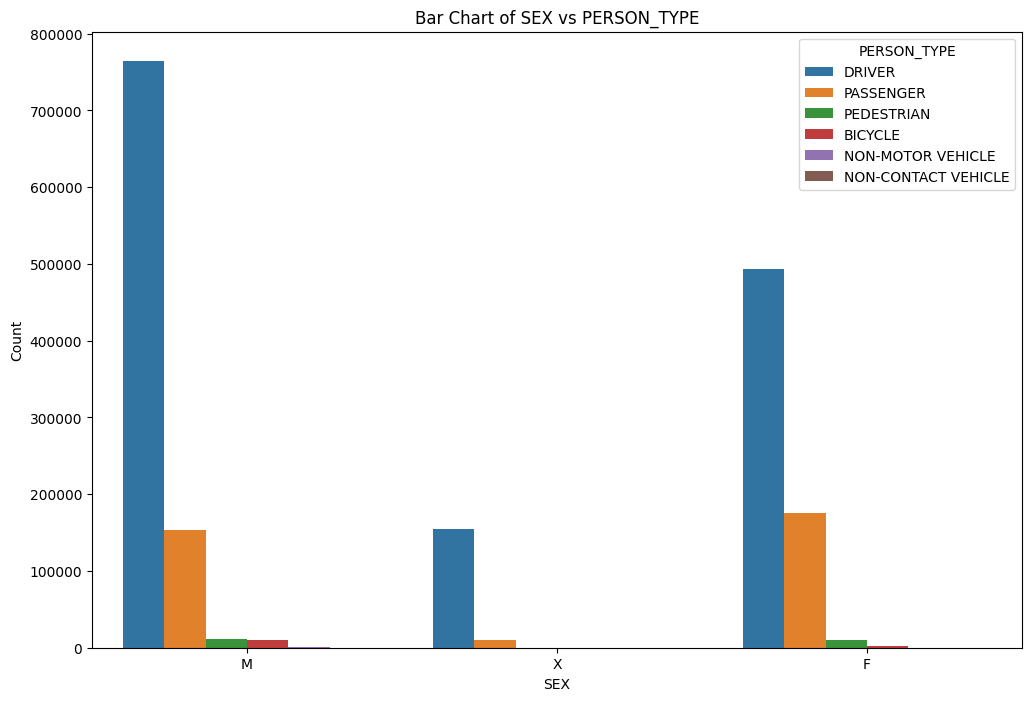

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=people_data, x='SEX', hue='PERSON_TYPE')
plt.title('Bar Chart of SEX vs PERSON_TYPE')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.legend(title='PERSON_TYPE')
plt.show()

 <div dir="rtl">نلاحظ أن معظم السائقين هم ذكور، ونسبة الركاب الإناث اكبر من الذكور ولكن بفرق أقل.. وبناء عليه سنقوم بتعبئة القيم المفقودة لل DRIVER و ال BICYCLE ب Male ولل PASSENGER والبقية ب Femal<div>
     <div dir="rtl">وبالنسبة للقيمة X مبدئياً سنتركها كما هي. <div>

In [ ]:
people_data.loc[(people_data['PERSON_TYPE'] == 'DEIVER') | (people_data['PERSON_TYPE'] == 'BICYCLE'), 'SEX'] = people_data.loc[(people_data['PERSON_TYPE'] == 'DEIVER') | (people_data['PERSON_TYPE'] == 'BICYCLE'), 'SEX'].fillna('M')
driver_bicyle_null = people_data[(people_data['PERSON_TYPE'] == 'DEIVER') | (people_data['PERSON_TYPE'] == 'BICYCLE')]['SEX'].isnull().sum()
print(f'null values in DRIVER and BICYCLE: {driver_bicyle_null}')

null values in DRIVER and BICYCLE: 0


In [ ]:
people_data['SEX'].fillna(value = 'F', inplace = True)
people_data['SEX'].isnull().sum()

0

 <div dir="rtl">للننتقل الى العمود DRIVERS_LICENSE_CLASS <div>

In [ ]:
people_data['DRIVERS_LICENSE_CLASS'].value_counts()

DRIVERS_LICENSE_CLASS
D     774058
A      31680
C      24294
B      24173
DM     13309
       ...  
PP         1
C2         1
D6         1
A+         1
JR         1
Name: count, Length: 281, dtype: int64

In [ ]:
people_data['DRIVERS_LICENSE_CLASS'].unique()

array(['D', nan, 'B', '9', 'A', 'BM', 'DM', 'AM', 'C', '99', 'CO', 'DL',
       'DV', 'O', 'UN', 'AB', 'CB', 'DA', 'CD', 'D*', 'E', 'NO', 'M', 'X',
       'CM', '`', 'U', 'UK', 'F', 'IP', '1', 'G', 'TV', 'S', 'EM', '3',
       '0', 'R', 'G2', 'L', 'CP', 'EO', 'PS', '10', 'LM', '00', 'DE',
       'CA', 'CL', 'OP', 'DD', 'N', 'P', ']', 'BE', 'K', 'PC', 'DF', 'IL',
       'AC', 'XD', '4D', 'NN', 'ID', 'D`', 'MC', 'J', 'C*', 'AL', 'CR',
       'A*', 'P1', 'H', 'CJ', 'B*', 'Z', '5', 'RG', 'T', '`D', 'ND', 'PB',
       'BC', 'RV', 'OL', '2', 'EC', 'NT', '02', 'OR', 'GM', 'SU', 'BD',
       'DC', 'AD', 'GE', 'V', 'DQ', 'IF', 'TX', 'PD', 'KL', 'TL', 'LP',
       '2B', 'W', 'A3', 'TD', '1F', ',D', '4A', 'I', 'LA', 'CC', 'BF',
       '-', 'ST', '3E', 'VL', 'HZ', 'TM', 'RE', 'PE', '9A', 'DN', 'P2',
       'DU', 'LL', 'MA', 'D1', '31', 'C1', 'BN', '16', 'DR', '4', 'MD',
       '*D', '.D', '6A', '08', '0A', 'OM', 'EB', 'KM', 'D7', 'MB', 'BL',
       'XX', 'DS', 'E0', 'NV', 'Q', 'OA', 'EQ', 'AZ', 'O

In [ ]:
pivot_table = people_data[people_data['DRIVERS_LICENSE_CLASS'].isin(['A', 'B', 'C', 'D', 'DM'])].pivot_table(index='DRIVERS_LICENSE_CLASS', columns='PERSON_TYPE', values='AGE', aggfunc=["mean"])
pivot_table

mean                    
PERSON_TYPE               DRIVER NON-CONTACT VEHICLE
DRIVERS_LICENSE_CLASS                               
A                      43.427849           48.875000
B                      46.395410           47.500000
C                      39.451491           34.490970
D                      40.209900           42.737054
DM                     44.739259           60.000000

In [ ]:
people_data.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEX', 'AGE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION'],
      dtype='object')

### [6] traffic-crashes

In [ ]:
crashes_data = origin_crashes_data.copy()


In [ ]:
crashes_data.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       

<div dir="rtl">
  مبدئيا وبناء على ملف الوصف وبعد الاستعانة خبير، يمكننا تجاهل الاعمدة التالية:
  </div>
  <div dir="rtl">
  CRASH_DATE_EST_I: تقدير تاريخ الحادث، غير ضروري إذا كان CRASH_DATE متاحًا.
  </div>
   <div dir="rtl">
DEVICE_CONDITION: حالة جهاز التحكم المروري، قد تكون أقل أهمية من نوع الجهاز نفسه.
 </div>  <div dir="rtl">
ALIGNMENT: محاذاة الشارع، يمكن تجاهله إذا كانت المعلومات الأخرى كافية.
 </div>  <div dir="rtl">
ROAD_DEFECT: عيوب الطريق، قد تكون غير ضرورية إذا كان التحليل لا يركز على حالة الطريق.
 </div>  <div dir="rtl">
REPORT_TYPE: نوع تقرير الحادث، غير مهم للتحليل العام.
 </div>  <div dir="rtl">
INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY_I, HIT_AND_RUN_I: مؤشرات قد تكون غير ضرورية إذا كانت التحليل يركز على شدة الحوادث أو الأسباب
</div>

In [ ]:
crashes_data.drop(['CRASH_DATE_EST_I', 'DEVICE_CONDITION', 'ALIGNMENT',
                  'ROAD_DEFECT', 'REPORT_TYPE', 'INTERSECTION_RELATED_I',
                  'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I'], axis = 1, inplace = True)

In [ ]:
info_df = pd.DataFrame()
info_df['missing_val'] = crashes_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / crashes_data.shape[0] * 100).round().astype(int)
info_df

,missing_val,missing_val_ratio
CRASH_RECORD_ID,0,0
CRASH_DATE,0,0
POSTED_SPEED_LIMIT,0,0
TRAFFIC_CONTROL_DEVICE,0,0
WEATHER_CONDITION,0,0
LIGHTING_CONDITION,0,0
FIRST_CRASH_TYPE,0,0
TRAFFICWAY_TYPE,0,0
LANE_CNT,624947,76
ROADWAY_SURFACE_COND,0,0


<div dir="rtl"> الاعمدة التالية:
LANE_CNT, PHOTOS_TAKEN_I, STATEMENTS_TAKEN_I, DOORING_I, WORK_ZONE_I, WORK_ZONE_TYPE, WORKERS_PRESENT_I </div> <div dir="rtl">
 تحتوي نسب عالية من ال missing values (أكثر من 60%)، لذلك سنقوم بتجاهلها ايضاً. </div>


In [ ]:
crashes_data.drop(['LANE_CNT', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
                  'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I'], axis = 1, inplace = True)

In [ ]:
crashes_data.shape

(823957, 32)

In [ ]:
info_df = pd.DataFrame()
info_df['missing_val'] = crashes_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / crashes_data.shape[0] * 100).round().astype(int)
info_df['data types'] = crashes_data.dtypes
info_df

,missing_val,missing_val_ratio,data types
CRASH_RECORD_ID,0,0,object
CRASH_DATE,0,0,object
POSTED_SPEED_LIMIT,0,0,int64
TRAFFIC_CONTROL_DEVICE,0,0,object
WEATHER_CONDITION,0,0,object
LIGHTING_CONDITION,0,0,object
FIRST_CRASH_TYPE,0,0,object
TRAFFICWAY_TYPE,0,0,object
ROADWAY_SURFACE_COND,0,0,object
CRASH_TYPE,0,0,object


<div dir="rtl">
العمود STREET_NAME يحتوي missing value واحدة فقط..
</div>
<div dir="rtl">
اوجدنا رقم الشارع من العمود STREET_NO، ثم تأكدنا ان القيمة ليست unique
</div>
<div dir="rtl">
ثم قمنا بتعبئتها بالقيمة الاكثر تكرار بناء على القيم التي تملك نفس رقم الشارع
</div>

In [ ]:
crashes_data.loc[crashes_data['STREET_NAME'].isnull(), ['STREET_NO']]

,STREET_NO
9769,532


In [ ]:
crashes_data.loc[crashes_data['STREET_NO'] == 532, 'STREET_NAME']

6225            83RD ST
9769                NaN
12470           87TH SD
14550           71ST ST
16335           87TH PL
              ...      
804176          95TH ST
804940    MILWAUKEE AVE
807555          79TH ST
808150      FRANKLIN ST
815613          76TH ST
Name: STREET_NAME, Length: 310, dtype: object

In [ ]:
# تحديد الصفوف التي تحتوي على STREET_NO تساوي 532
filtered_data = crashes_data[crashes_data['STREET_NO'] == 532]

# العثور على القيمة الأكثر تكرارًا في عمود STREET_NAME للصفوف المحددة
most_common_street_name = filtered_data['STREET_NAME'].mode()[0]

# تعبئة القيم المفقودة في عمود STREET_NAME بالقيمة الأكثر تكرارًا للصفوف المحددة
crashes_data['STREET_NAME'].fillna(most_common_street_name, inplace = True)

crashes_data['STREET_NAME'].isnull().sum()

0

In [ ]:
crashes_data[['LATITUDE', 'LONGITUDE']].describe()

,LATITUDE,LONGITUDE
count,818267.000000,818267.000000
mean,41.854908,-87.673596
std,0.335164,0.681035
min,0.000000,-87.936193
25%,41.782557,-87.721764
50%,41.874827,-87.674195
75%,41.924410,-87.633428
max,42.022780,0.000000


<div dir="rtl">
نلاحظ أن توزع البيانات في العمودين LATITUDE و LONGITUDE طبيعي، لذلك سنستخدم قيمة المتوسط لمعالجة ال missing values فيهما
</div>

In [ ]:
latitude_mean = crashes_data['LATITUDE'].mean()
longitude_mean = crashes_data['LONGITUDE'].mean()

crashes_data['LATITUDE'].fillna(latitude_mean, inplace=True)
crashes_data['LONGITUDE'].fillna(longitude_mean, inplace=True)

crashes_data[['LATITUDE', 'LONGITUDE']].isnull().sum()

LATITUDE     0
LONGITUDE    0
dtype: int64

In [ ]:
info_df = pd.DataFrame()
info_df['missing_val'] = crashes_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / crashes_data.shape[0] * 100).round().astype(int)
info_df['data types'] = crashes_data.dtypes
info_df

,missing_val,missing_val_ratio,data types
CRASH_RECORD_ID,0,0,object
CRASH_DATE,0,0,object
POSTED_SPEED_LIMIT,0,0,int64
TRAFFIC_CONTROL_DEVICE,0,0,object
WEATHER_CONDITION,0,0,object
LIGHTING_CONDITION,0,0,object
FIRST_CRASH_TYPE,0,0,object
TRAFFICWAY_TYPE,0,0,object
ROADWAY_SURFACE_COND,0,0,object
CRASH_TYPE,0,0,object


In [ ]:
crashes_data['CRASH_HOUR'].isnull().sum()

0

In [ ]:
crashes_data['CRASH_DAY_OF_WEEK'].isnull().sum()

0

# [b] From Raw to Information

### [i] استخراج العام الذي حدث به الحادث المروري وضعه ضمن عمود جديد


In [ ]:
# تحويل عمود CRASH_DATE إلى نوع بيانات تاريخي
people_data['CRASH_DATE'] = pd.to_datetime(people_data['CRASH_DATE'])

# استخراج العام ووضعه في عمود جديد
people_data['CRASH_YEAR'] = people_data['CRASH_DATE'].dt.year

people_data[['CRASH_DATE', 'CRASH_YEAR']].head()

,CRASH_DATE,CRASH_YEAR
0,2019-09-28 03:30:00,2019
1,2020-04-13 22:50:00,2020
2,2015-11-01 05:00:00,2015
3,2015-11-01 08:00:00,2015
4,2015-11-01 10:15:00,2015


In [ ]:
vehicles_data['CRASH_DATE'] = pd.to_datetime(vehicles_data['CRASH_DATE'])

vehicles_data['CRASH_YEAR'] = vehicles_data['CRASH_DATE'].dt.year

vehicles_data[['CRASH_DATE', 'CRASH_YEAR']].head()

<ipython-input-84-4959d25e559d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vehicles_data['CRASH_DATE'] = pd.to_datetime(vehicles_data['CRASH_DATE'])


,CRASH_DATE,CRASH_YEAR
0,2023-12-06 15:24:00,2023
1,2023-12-06 16:00:00,2023
2,2023-12-06 16:30:00,2023
3,2023-12-10 12:12:00,2023
4,2023-12-10 12:12:00,2023


In [ ]:
crashes_data['CRASH_DATE'] = pd.to_datetime(crashes_data['CRASH_DATE'])

crashes_data['CRASH_YEAR'] = crashes_data['CRASH_DATE'].dt.year

crashes_data[['CRASH_DATE', 'CRASH_YEAR']].head()

,CRASH_DATE,CRASH_YEAR
0,2023-08-18 12:50:00,2023
1,2023-07-29 14:45:00,2023
2,2023-08-18 17:58:00,2023
3,2019-11-26 08:38:00,2019
4,2023-08-18 10:45:00,2023


### [ii]  .عدد الركاب في كل مركبة، متوسط عدد الركاب، متوسط عمر الراكب في كل حادث


In [ ]:
people_data['VEHICLE_ID'].value_counts()

VEHICLE_ID
366311.0     89
332155.0     60
643997.0     47
1583198.0    47
1538062.0    44
             ..
210050.0      1
210053.0      1
210047.0      1
20589.0       1
1645926.0     1
Name: count, Length: 1426673, dtype: int64

In [ ]:
# تحديد الركاب فقط (استثناء السائقين)
passengers_data = people_data[people_data['PERSON_TYPE'] == 'PASSENGER']

# حساب عدد الركاب لكل مركبة
passengers_count = passengers_data.groupby('VEHICLE_ID').size().reset_index(name='PASSENGER_COUNT')

passengers_count

,VEHICLE_ID,PASSENGER_COUNT
0,28.0,2
1,32.0,1
2,33.0,3
3,58.0,3
4,59.0,1
...,...,...
248587,1712792.0,1
248588,1712811.0,1
248589,1712822.0,3
248590,1712853.0,3


In [ ]:
# حساب عدد الركاب لكل حادث
passengers_count_per_crash = passengers_data.groupby('CRASH_RECORD_ID').size().reset_index(name='PASSENGER_COUNT')

# حساب متوسط عدد الركاب لكل حادث على مستوى جميع الحوادث
average_passenger_count_per_crash = passengers_count_per_crash['PASSENGER_COUNT'].mean()
print(f"Average number of passengers per crash: {average_passenger_count_per_crash}")

# حساب متوسط عمر الركاب لكل حادث
average_age_per_crash = passengers_data.groupby('CRASH_RECORD_ID')['AGE'].mean().reset_index(name='AVERAGE_PASSENGER_AGE')

crash_passenger_stats = pd.merge(passengers_count_per_crash, average_age_per_crash, on='CRASH_RECORD_ID')

crash_passenger_stats


Average number of passengers per crash: 1.700407124681934


,CRASH_RECORD_ID,PASSENGER_COUNT,AVERAGE_PASSENGER_AGE
0,000147996f20cbda9acdf79117aeb7652b0c1024ce0699...,1,27.967696
1,000179b336bde73b863dc447f21d58ff88216fc4835c97...,1,21.000000
2,00019665871af0cae1dfd7f00cb06d69acab5809420319...,1,27.967696
3,0001dc2c34878baec9b7223e7ead101e0487e2e994c977...,1,24.000000
4,0001f72c48b956e2ec5dc8843a99d152b7d79610c8d7f5...,2,32.483848
...,...,...,...
216145,ffff1abe18740e725b54c8e2451648e1d879528c04e8dd...,3,36.333333
216146,ffff327f55566f969a1a1050f1145f680de5ddab723158...,3,15.000000
216147,ffff5751c03ed1580b49a4f1782dd2001c2046d48e3937...,1,38.000000
216148,ffffa944b3d7267d25748e1cd44250bea2da4a5aa2e0a9...,1,27.967696


### [iii] حساب عدد المركبات لكل حادث مروري


In [ ]:
vehicles_count_per_crash = vehicles_data.groupby('CRASH_RECORD_ID')['VEHICLE_ID'].nunique().reset_index(name='VEHICLE_COUNT')

vehicles_count_per_crash

,CRASH_RECORD_ID,VEHICLE_COUNT
0,000013b0123279411e0ec856dae95ab9f0851764350b7f...,2
1,00002c0771fb6f2c70ba775b7f6b501608cadea85c1dd1...,2
2,000043c6564ec4d54bc4efd957d97ca97f38a965dd64b4...,1
3,00005696946846c8b8a1d378dba4e2a5ed84a9b2876fe0...,1
4,000070ed7a6357c3298f5edc6fb7d5ce925a10f46660f3...,2
...,...,...
823858,ffffc784918a94c6d5ec9cdced500004faafc6a9e6e01b...,2
823859,ffffc802346fd6f48f99117898fbc558237a3052c327b8...,2
823860,ffffd143cf6dc784876069140869d2d724080089450108...,2
823861,ffffe467b0d2d95c897e8c2721941f87dede1661a3b60c...,2


### [iv]عمر المركبة

In [ ]:
# Convert 'VEHICLE_YEAR' column to numeric values
vehicles_data['VEHICLE_YEAR'] = pd.to_numeric(vehicles_data['VEHICLE_YEAR'])

# Extract vehicle age from 'VEHICLE_YEAR' and 'CRASH_DATE'
vehicles_data['VEHICLE_AGE'] = (pd.to_datetime(vehicles_data['CRASH_DATE']) - pd.to_datetime(vehicles_data['VEHICLE_YEAR'], format='%Y')).dt.days / 365.25

# Classify vehicle ages into groups
vehicles_data['VEHICLE_AGE_GROUP'] = pd.cut(vehicles_data['VEHICLE_AGE'], bins=[-1, 5, 20, float('inf')], labels=['جديد', 'قديم', 'عتيق'])

In [ ]:
vehicles_data['VEHICLE_AGE_GROUP']

0          قديم
1          قديم
2          قديم
3          قديم
4          جديد
           ... 
1680887    قديم
1680888    قديم
1680889    قديم
1680890    قديم
1680891    جديد
Name: VEHICLE_AGE_GROUP, Length: 1642419, dtype: category
Categories (3, object): ['جديد' < 'قديم' < 'عتيق']

### [v]اصناف عمر مركبات






In [ ]:
# # Bin the vehicle ages into the desired categories
# bins = [-1, 5, 10, float('inf')]
# labels = ['جديد', 'قديم', 'عتيق']

# vehicles_data['VEHICLE_AGE_GROUP'] = pd.cut(vehicles_data['VEHICLE_AGE'], bins=bins, labels=labels)

# # Create a multi-categorical feature for vehicle age
vehicles_data['VEHICLE_AGE_MULTICATEGORY'] = vehicles_data['VEHICLE_AGE_GROUP'].str.split(', ', expand=True).fillna('').apply(lambda x: ', '.join(x.unique()), axis=1)

### [vi] تجميع المواقع الجيوغرافية للحوادث المرورية

<div dir="rtl">
تم استخدام دقة geohash بطول 6 حروف كدقة مناسبة لتحليل الحوادث المرورية ضمن مناطق حضرية.
</div>

In [ ]:
# تحويل الإحداثيات الجغرافية إلى خلايا geohash
crashes_data['geohash'] = crashes_data.apply(lambda row: geohash2.encode(row['LATITUDE'], row['LONGITUDE'], precision=6), axis=1)

crashes_data[['CRASH_RECORD_ID', 'LATITUDE', 'LONGITUDE', 'geohash']]

,CRASH_RECORD_ID,LATITUDE,LONGITUDE,geohash
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,41.854908,-87.673596,dp3whg
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,41.854120,-87.665902,dp3wj5
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,41.942976,-87.761883,dp3wdg
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,41.854908,-87.673596,dp3whg
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,41.854908,-87.673596,dp3whg
...,...,...,...,...
823952,3d00cf22a912d0e18809db862dd67e5812f7b6af1ffa3d...,41.778580,-87.738679,dp3tem
823953,45d62ddd4e4b5572d253cc072b3927afc15489728f1ba8...,41.798505,-87.723459,dp3tgc
823954,6bd73dc0b10ee0272e9269bec32b57327611c2ad3cf19b...,41.876044,-87.700459,dp3whr
823955,f2c0204e5392ff379e5804ad25fad66304949d517327c6...,41.776184,-87.703219,dp3tsm


### [vii]   تجزئة للقطاعات الجغرافية إلى 3 فئات


<div dir="rtl">
سنقوم بتجزئة القطاعات بناءً على عدد الحوادث في كل قطاع، وذلك باستخدام دالة quantile..
</div>
<div dir="rtl">
مبدأ عمل quantile أنها تقوم يتقسيم البيانات إلى أجزاء متساوية..
</div>

In [ ]:
# حساب عدد الحوادث في كل قطاع جغرافي
geohash_counts = crashes_data['geohash'].value_counts().reset_index()
geohash_counts.columns = ['geohash', 'crash_count']

# تقسيم القطاعات إلى 3 فئات بناءً على عدد الحوادث
red_threshold = geohash_counts['crash_count'].quantile(0.66)
yellow_threshold = geohash_counts['crash_count'].quantile(0.33)

# تعيين الفئات
def assign_category(count):
    if count >= red_threshold:
        return 'Red' # تشمل القطاعات التي تحتوي على عدد كبير من الحوادث
    elif count >= yellow_threshold:
        return 'Yellow' # تشمل القطاعات التي تحتوي على عدد متوسط من الحوادث
    else:
        return 'Gray' # تشمل القطاعات التي تحتوي على عدد قليل من الحوادث

geohash_counts['category'] = geohash_counts['crash_count'].apply(assign_category)

crashes_data = crashes_data.merge(geohash_counts[['geohash', 'category']], on='geohash', how='left')

crashes_data.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,CRASH_TYPE,...,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,PEAK_TRAFFIC_PERIOD,CRASH_YEAR,geohash,category
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15,OTHER,CLEAR,DAYLIGHT,REAR END,OTHER,DRY,INJURY AND / OR TOW DUE TO CRASH,...,12,6,8,41.854908,-87.673596,NaN,Off-Peak,2023,dp3whg,Red
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO INJURY / DRIVE AWAY,...,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952),Off-Peak,2023,dp3wj5,Red
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,2023-08-18 17:58:00,30,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,DRY,INJURY AND / OR TOW DUE TO CRASH,...,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006),Peak,2023,dp3wdg,Yellow
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,2019-11-26 08:38:00,25,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,DRY,INJURY AND / OR TOW DUE TO CRASH,...,8,3,11,41.854908,-87.673596,NaN,Peak,2019,dp3whg,Red
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,2023-08-18 10:45:00,20,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,DRY,NO INJURY / DRIVE AWAY,...,10,6,8,41.854908,-87.673596,NaN,Off-Peak,2023,dp3whg,Red


### [viii] حساب طول كل شارع

In [ ]:
# تحويل الاطوال من القدم الى KM
street_data['LENGTH_KM'] = street_data['LENGTH'] * 0.0003048

# حساب حدود الفئات الثلاث باستخدام الدالة quantile
short_threshold = street_data['LENGTH_KM'].quantile(0.33)
medium_threshold = street_data['LENGTH_KM'].quantile(0.66)

# تعيين الفئة لكل شارع بناءً على طوله
def categorize_length(length):
    if length <= short_threshold:
        return 'short'
    elif length <= medium_threshold:
        return 'medium'
    else:
        return 'long'

street_data['LENGTH_CATEGORY'] = street_data['LENGTH_KM'].apply(categorize_length)

# دمج بيانات الفئات مع جدول الحوادث المرورية
crashes_data = pd.merge(crashes_data,
                       street_data[['STREETNAME', 'LENGTH_KM', 'LENGTH_CATEGORY']],
                       how='left',
                       left_on='STREET_NO',
                       right_on='STREETNAME').drop(columns=['STREETNAME'])

crashes_data.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,CRASH_TYPE,...,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,PEAK_TRAFFIC_PERIOD,CRASH_YEAR,geohash,category,LENGTH_KM,LENGTH_CATEGORY
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15,OTHER,CLEAR,DAYLIGHT,REAR END,OTHER,DRY,INJURY AND / OR TOW DUE TO CRASH,...,8,41.854908,-87.673596,NaN,Off-Peak,2023,dp3whg,Red,0.126588,medium
1,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15,OTHER,CLEAR,DAYLIGHT,REAR END,OTHER,DRY,INJURY AND / OR TOW DUE TO CRASH,...,8,41.854908,-87.673596,NaN,Off-Peak,2023,dp3whg,Red,0.101381,medium
2,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15,OTHER,CLEAR,DAYLIGHT,REAR END,OTHER,DRY,INJURY AND / OR TOW DUE TO CRASH,...,8,41.854908,-87.673596,NaN,Off-Peak,2023,dp3whg,Red,0.101663,medium
3,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15,OTHER,CLEAR,DAYLIGHT,REAR END,OTHER,DRY,INJURY AND / OR TOW DUE TO CRASH,...,8,41.854908,-87.673596,NaN,Off-Peak,2023,dp3whg,Red,0.101232,medium
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15,OTHER,CLEAR,DAYLIGHT,REAR END,OTHER,DRY,INJURY AND / OR TOW DUE TO CRASH,...,8,41.854908,-87.673596,NaN,Off-Peak,2023,dp3whg,Red,0.100991,medium


<div dir="rtl">
بداية قمنا بتحويل الاطوال الى km لانها في الجدول موجودة بالقدم..
</div>
<div dir="rtl">
بعد تقسيم فئات الشوارع حسب الاطوال، قمنا بدمج عمود الطول بعد التحويل STREET_KM بالإضافة لعمود الفءة LENGTH_CATEGORY كما هو مطلوب
</div>

In [ ]:
crashes_data['LENGTH_CATEGORY'].isnull().sum()

478834

In [ ]:
crashes_data['LENGTH_KM'].isnull().sum()

478834

<div dir="rtl">
معالجة ال missung values في العمودين اللذين تم إضافتها الى الجدول crashes_data
</div>

In [ ]:
street_category_avg = crashes_data.groupby('LENGTH_CATEGORY')['STREET_NAME'].agg(lambda x: x.mode().iloc[0])
street_category_avg

LENGTH_CATEGORY
long      MICHIGAN AVE
medium      CICERO AVE
short     MICHIGAN AVE
Name: STREET_NAME, dtype: object

<div dir="rtl">
تم تجريب الكثير من الطرق لمعالجة القيم المفقودة في العمود LEENGTH_CATEGORY لكن التوزع كان متساوي بين جميع الفئات بالنسبة لاسم الشارع، رقم الشارع، نوع الشارع..
</div>
<div dir="rtl">
تم تجريب معالجتها باستخدام مودل لكن تم استهلاك كامل الرام قبل ان ينهي التنبؤ..
</div>
<div dir="rtl">
بالنهاية تم تعبئتها بالقيمة الاكثر تكرار
</div>

In [ ]:
# حساب القيمة الأكثر تكرارًا في عمود LENGTH_CATEGORY
most_frequent_length_category = crashes_data['LENGTH_CATEGORY'].mode()[0]

# تعبئة القيم المفقودة بالقيمة الأكثر تكرارًا
crashes_data['LENGTH_CATEGORY'].fillna(most_frequent_length_category, inplace=True)


crashes_data['LENGTH_CATEGORY'].isnull().sum()

0

In [ ]:
street_length_avg = crashes_data.groupby('LENGTH_CATEGORY')['LENGTH_KM'].mean()
street_length_avg

LENGTH_CATEGORY
long      0.247786
medium    0.112949
short     0.061147
Name: LENGTH_KM, dtype: float64

<div dir="rtl">
تم تعبئة القيم المفقودة في عمود LENGTH_KM بالاعتماد على فءة الشارع
</div>

In [ ]:
# تعبئة القيم المفقودة في عمود AGE باستخدام القيم المتوسطة لكل نوع
for length_category in street_length_avg.index:
    # تحديد القيم المتوسطة للأعمار لكل نوع
    length_avg = street_length_avg[length_category]

    # تحديد الصفوف التي تحتاج إلى تعبئة
    mask = (crashes_data['LENGTH_CATEGORY'] == length_category) & (crashes_data['LENGTH_KM'].isnull())

    # تحديث القيم المفقودة باستخدام القيم المتوسطة
    crashes_data.loc[mask, 'LENGTH_KM'] = length_avg

crashes_data['LENGTH_KM'].isnull().sum()

0

### [ix]  بعد كل حادث عن المنطقة التجارية

In [ ]:
# تحويل أعمدة LATITUDE و LONGITUDE إلى نقاط جغرافية
crashes_gdf = gpd.GeoDataFrame(crashes_data,
                               geometry=gpd.points_from_xy(crashes_data.LONGITUDE, crashes_data.LATITUDE))

In [ ]:
# تحويل عمود the_geom إلى كائنات هندسية
cbd_data['the_geom'] = cbd_data['the_geom'].apply(wkt.loads)

In [ ]:
# تحميل المضلع الجيوغرافي للمنطقة التجارية المركزية
cbd_polygon = cbd_data['the_geom'].iloc[0]

# إذا كان الكائن MultiPolygon، نستخدم unary_union لتحويله إلى Polygon
if isinstance(cbd_polygon, MultiPolygon):
    cbd_polygon = cbd_polygon.buffer(0)
elif not isinstance(cbd_polygon, Polygon):
    raise TypeError("Expected a Polygon or MultiPolygon geometry, got {}".format(type(cbd_polygon)))


In [ ]:
# التأكد من أن العمود الهندسي هو Point
if not all(crashes_gdf['geometry'].apply(lambda x: isinstance(x, Point))):
    raise TypeError("All geometry entries should be of type Point")


In [ ]:
# حساب المسافة من كل حادث إلى المضلع الجيوغرافي للمنطقة التجارية المركزية بالكيلومتر
crashes_gdf['distance_to_cbd'] = crashes_gdf['geometry'].apply(lambda x: x.distance(cbd_polygon) / 1000)

In [ ]:
# تقسيم المسافة إلى ثلاث فئات: قريب، متوسط البعد، بعيد
distance_thresholds = np.quantile(crashes_gdf['distance_to_cbd'], [0.33, 0.66])
crashes_gdf['distance_category'] = pd.cut(crashes_gdf['distance_to_cbd'],
                                          bins=[-np.inf, distance_thresholds[0], distance_thresholds[1], np.inf],
                                          labels=['NEAR', 'MEDIUM ', 'FAR'])

crashes_data[['LATITUDE', 'LONGITUDE', 'distance_to_cbd', 'distance_category']]

In [ ]:
crashes_data[['distance_to_cbd', 'distance_category']] = crashes_gdf[['distance_to_cbd', 'distance_category']]
crashes_data.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,CRASH_TYPE,...,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,distance_to_cbd,distance_category
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,CLEAR,DAYLIGHT,REAR END,OTHER,DRY,INJURY AND / OR TOW DUE TO CRASH,...,1.0,0.0,12,6,8,41.854908,-87.673596,NaN,0.000029,قريب
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO INJURY / DRIVE AWAY,...,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952),0.000023,قريب
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,08/18/2023 05:58:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,DRY,INJURY AND / OR TOW DUE TO CRASH,...,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006),0.000123,بعيد
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,11/26/2019 08:38:00 AM,25,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,DRY,INJURY AND / OR TOW DUE TO CRASH,...,1.0,0.0,8,3,11,41.854908,-87.673596,NaN,0.000029,قريب
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,08/18/2023 10:45:00 AM,20,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,DRY,NO INJURY / DRIVE AWAY,...,1.0,0.0,10,6,8,41.854908,-87.673596,NaN,0.000029,قريب


### [x]
<div dir="rtl">
إجراء عملية Binarization لعمود البعد عن المنطقة التجارية
</div>

In [ ]:
# تحديد ما إذا كان الحادث ضمن المنطقة التجارية المركزية
crashes_gdf['within_cbd'] = crashes_gdf['geometry'].apply(lambda x: 1 if x.within(cbd_polygon) else 0)

crashes_gdf[['LATITUDE', 'LONGITUDE', 'within_cbd']]

,LATITUDE,LONGITUDE,within_cbd
0,41.854908,-87.673596,0
1,41.854120,-87.665902,0
2,41.942976,-87.761883,0
3,41.854908,-87.673596,0
4,41.854908,-87.673596,0
...,...,...,...
823952,41.778580,-87.738679,0
823953,41.798505,-87.723459,0
823954,41.876044,-87.700459,0
823955,41.776184,-87.703219,0


<div dir="rtl">
0 --> الحادث خارج المنطقة
</div>
<div dir="rtl">
1 --> الحادث داخل المنطقة
</div>

In [ ]:
crashes_data[['within_cbd']] = crashes_gdf[['within_cbd']]
crashes_data.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,CRASH_TYPE,...,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,distance_to_cbd,distance_category,within_cbd
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,CLEAR,DAYLIGHT,REAR END,OTHER,DRY,INJURY AND / OR TOW DUE TO CRASH,...,0.0,12,6,8,41.854908,-87.673596,NaN,0.000029,قريب,0
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO INJURY / DRIVE AWAY,...,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952),0.000023,قريب,0
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,08/18/2023 05:58:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,DRY,INJURY AND / OR TOW DUE TO CRASH,...,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006),0.000123,بعيد,0
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,11/26/2019 08:38:00 AM,25,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,DRY,INJURY AND / OR TOW DUE TO CRASH,...,0.0,8,3,11,41.854908,-87.673596,NaN,0.000029,قريب,0
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,08/18/2023 10:45:00 AM,20,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,DRY,NO INJURY / DRIVE AWAY,...,0.0,10,6,8,41.854908,-87.673596,NaN,0.000029,قريب,0


### [xi] المقاطعة الشرطية التي حدث بها كل لحادث مروري

In [ ]:
# تحويل عمود the_geom إلى كائنات هندسية
police_data['geometry'] = police_data['the_geom'].apply(wkt.loads)

In [ ]:
# تحويل police_data إلى GeoDataFrame
police_gdf = gpd.GeoDataFrame(police_data, geometry='geometry')

In [ ]:
# التأكد من أن النظام الإحداثي متطابق بين الجداول
crashes_gdf.set_crs(epsg=4326, inplace=True)  # تأكد من أن نظام الإحداثيات الجغرافي هو WGS84
police_gdf.set_crs(epsg=4326, inplace=True)

,the_geom,DISTRICT,BEAT,BEAT_NUM,geometry
0,MULTIPOLYGON (((-87.7047252651434 41.975774430...,17,1,1713,"MULTIPOLYGON (((-87.70473 41.97577, -87.70472 ..."
1,MULTIPOLYGON (((-87.83365455041093 41.97535481...,31,0,3100,"MULTIPOLYGON (((-87.83365 41.97535, -87.83366 ..."
2,MULTIPOLYGON (((-87.90684167275818 41.97656175...,16,5,1651,"MULTIPOLYGON (((-87.90684 41.97656, -87.91070 ..."
3,MULTIPOLYGON (((-87.64491798475646 41.96972709...,19,1,1914,"MULTIPOLYGON (((-87.64492 41.96973, -87.64431 ..."
4,MULTIPOLYGON (((-87.63724132684592 41.96598776...,19,1,1915,"MULTIPOLYGON (((-87.63724 41.96599, -87.63644 ..."
...,...,...,...,...,...
272,MULTIPOLYGON (((-87.58879491369598 41.78612259...,3,1,314,"MULTIPOLYGON (((-87.58879 41.78612, -87.58844 ..."
273,MULTIPOLYGON (((-87.67917077210467 41.78656347...,8,2,825,"MULTIPOLYGON (((-87.67917 41.78656, -87.67912 ..."
274,MULTIPOLYGON (((-87.6085394544142 41.785829320...,3,1,313,"MULTIPOLYGON (((-87.60854 41.78583, -87.60808 ..."
275,MULTIPOLYGON (((-87.69354469346045 41.78458419...,8,2,823,"MULTIPOLYGON (((-87.69354 41.78458, -87.69354 ..."


In [ ]:
# استخدام عملية spatial join لتحديد المقاطعة الشرطية لكل حادث
crashes_with_districts = gpd.sjoin(crashes_gdf, police_gdf[['geometry', 'DISTRICT', 'BEAT', 'BEAT_NUM']], how='left', op='within')

crashes_with_districts[['CRASH_RECORD_ID', 'DISTRICT', 'BEAT', 'BEAT_NUM']]

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,CRASH_RECORD_ID,DISTRICT,BEAT,BEAT_NUM
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,12.0,3.0,1234.0
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,12.0,3.0,1235.0
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,16.0,3.0,1633.0
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,12.0,3.0,1234.0
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,12.0,3.0,1234.0
...,...,...,...,...
823952,3d00cf22a912d0e18809db862dd67e5812f7b6af1ffa3d...,8.0,1.0,813.0
823953,45d62ddd4e4b5572d253cc072b3927afc15489728f1ba8...,8.0,1.0,815.0
823954,6bd73dc0b10ee0272e9269bec32b57327611c2ad3cf19b...,11.0,2.0,1124.0
823955,f2c0204e5392ff379e5804ad25fad66304949d517327c6...,8.0,2.0,823.0


### [xii]  إنشاء سمة جديدة

<div dir="rtl">
سنقوم بإنشاء سمة تمثل "فترة الذروة المرورية" (Peak Traffic Period) لكل حادث مروري، وذلك باستخدام المعلومات الزمنية المتعلقة بوقت الحادث (مثل ساعة الحادث ويوم الأسبوع).

السمة الجديدة ستكون مفيدة في التحليل لتحديد تأثير أوقات الذروة المرورية على الحوادث.
</div>

In [ ]:
def determine_peak_period(hour, day_of_week):
    if day_of_week in [1, 7]:  # نهاية الأسبوع (الأحد والسبت)
        if 16 <= hour <= 20:  # فترة الذروة خلال نهاية الأسبوع من 4 مساءً إلى 8 مساءً
            return 'Peak'
        else:
            return 'Off-Peak'
    else:  # أيام الأسبوع (الاثنين إلى الجمعة)
        if (7 <= hour <= 9) or (16 <= hour <= 19):  # فترة الذروة خلال أيام الأسبوع من 7-9 صباحًا و 4-7 مساءً
            return 'Peak'
        else:
            return 'Off-Peak'


In [ ]:
# تطبيق الدالة على كل صف لإنشاء سمة جديدة
crashes_data['PEAK_TRAFFIC_PERIOD'] = crashes_data.apply(lambda row: determine_peak_period(row['CRASH_HOUR'], row['CRASH_DAY_OF_WEEK']), axis=1)

# عرض النتائج للتأكد من السمة الجديدة
crashes_data[['CRASH_RECORD_ID', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'PEAK_TRAFFIC_PERIOD']].head()

,CRASH_RECORD_ID,CRASH_HOUR,CRASH_DAY_OF_WEEK,PEAK_TRAFFIC_PERIOD
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,12,6,Off-Peak
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,14,7,Off-Peak
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,17,6,Peak
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,8,3,Peak
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,10,6,Off-Peak


<div dir="rtl">
سنقوم بعمل نسخة نهائية للجدول crashes_data يحتوي على الاعمدة التي تم الاستفادة منها فقط
</div>

# Question [2]: Data Analysis and Information Discovery

## [a] Traffic Accidents Causes


### [i] رسم عدد الحوادث حسب السبب الرئيسي

In [ ]:

prim_cause_counts = crashes_data['PRIM_CONTRIBUTORY_CAUSE'].value_counts()


prim_cause_counts = prim_cause_counts.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
prim_cause_counts.plot(kind='bar')
plt.title('Primary Contributory Causes of Accidents')
plt.xlabel('Primary Contributory Cause')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

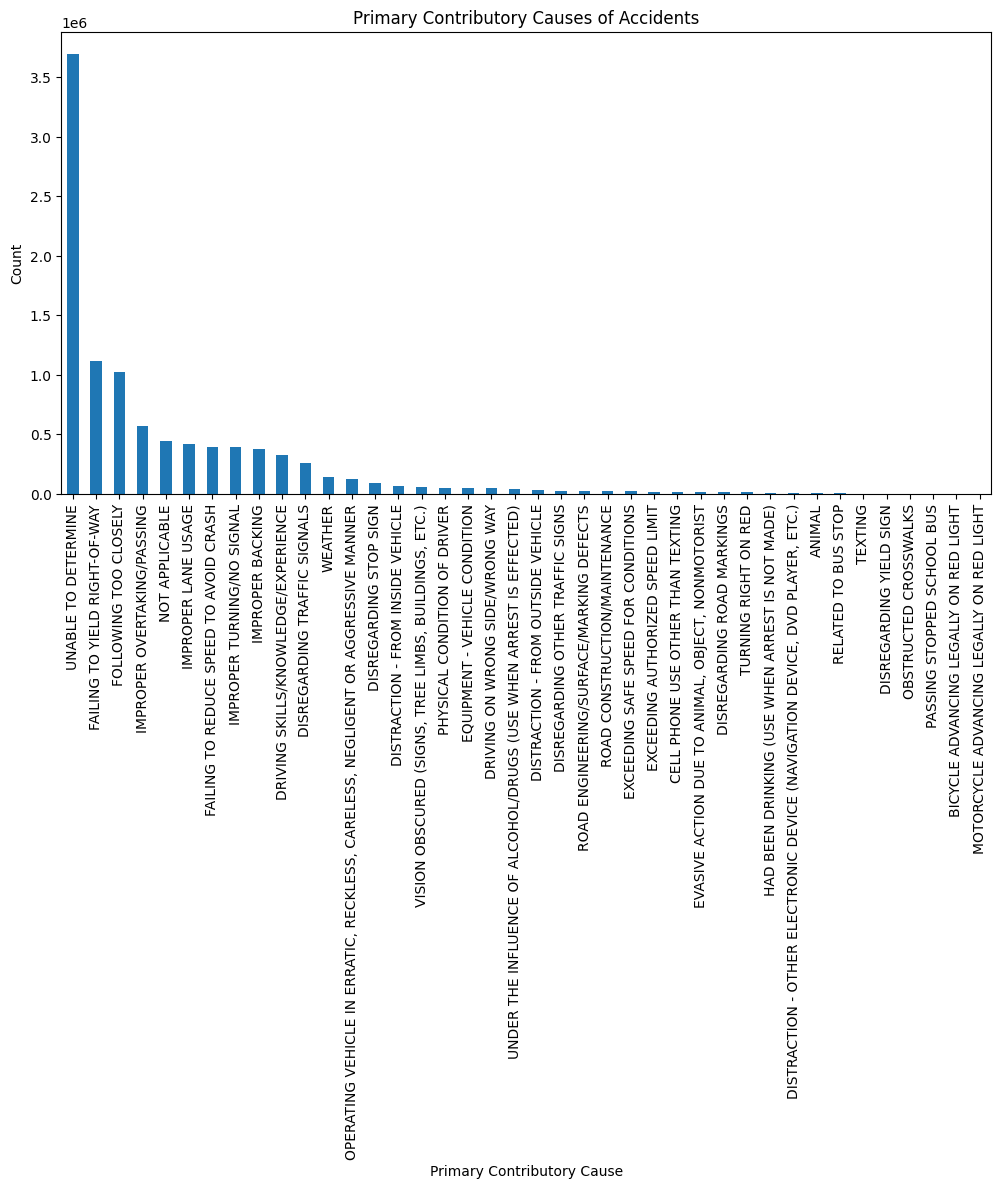

أكثر الأسباب أهمية:

الفشل في إعطاء حق المرور: 7,405 حادث
القيادة بتهور: 2,368 حادث
عدم الالتزام بإشارات المرور: 1,614 حادث



أقل الأسباب أهمية:

التسريع المفرط: 40 حادث
الرجوع بطريقة خاطئة: 70 حادث
المشاكل في تصميم الطرق: 87 حادث


إعطاء حق المرور والقيادة بتهور وعدم الالتزام بإشارات المرور هي العوامل الأكثر إسهاما في وقوع الحوادث. في المقابل، التسريع المفرط والرجوع بطريقة خاطئة والمشاكل في تصميم الطرق تمثل أقل الأسباب المساهمة.

### [ii]  رسم عدد الحوادث حسب ظروف الاضاءة و الفئة الضرر المقدر من ضابط

In [ ]:
lighting_damage_counts = crashes_data.groupby(['LIGHTING_CONDITION', 'DAMAGE']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
lighting_damage_counts.plot(kind='bar')
plt.title('Accidents by Lighting Condition and Damage Level')
plt.xlabel('Lighting Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Damage Level')
plt.show()

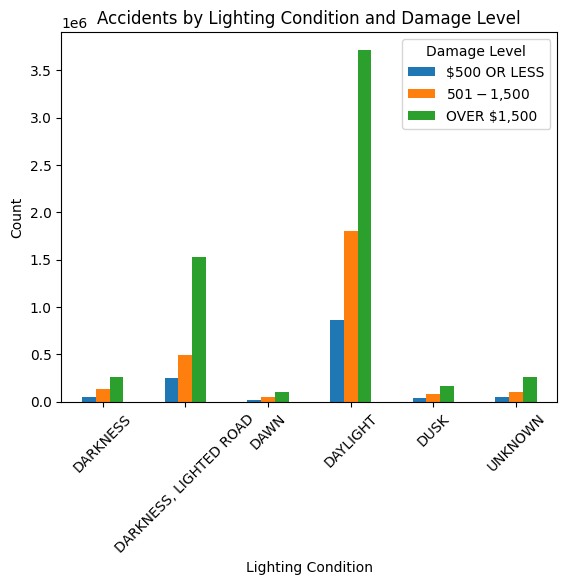

بستنج انواكثر عدد حوادث بسبب ظروف الظلام تاما ونسبة اضرار اكثر من 1500$
واقل الحوادث تكون الفجر والغسق

*   أكبر عدد من الحوادث يقع في ظروف "ضوء النهار"، مع غالبية الحوادث في فئة "500 دولار أو أقل" لمستوى الضرر.
*   في ظروف "الظلام"، هناك عدد أقل من الحوادث بشكل عام، ولكن نسبة كبيرة منها تؤدي إلى "أكثر من 1,500 دولار" في الضرر.



*   ظروف الإضاءة "الشفق" و"غير معروف" لديها عدد أقل نسبيًا من الحوادث، ولكن التوزيع عبر مستويات الضرر أكثر انتظامًا.






### [iii] رسم عدد حوادث حسب تصنيف خطورة الحادث ونوع الاصطدام اول

In [ ]:
crash_type_counts = crashes_data.groupby(['CRASH_TYPE', 'FIRST_CRASH_TYPE']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))
crash_type_counts.plot(kind='bar', stacked=True)
plt.title('Accidents by Crash Type and First Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='First Crash Type', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

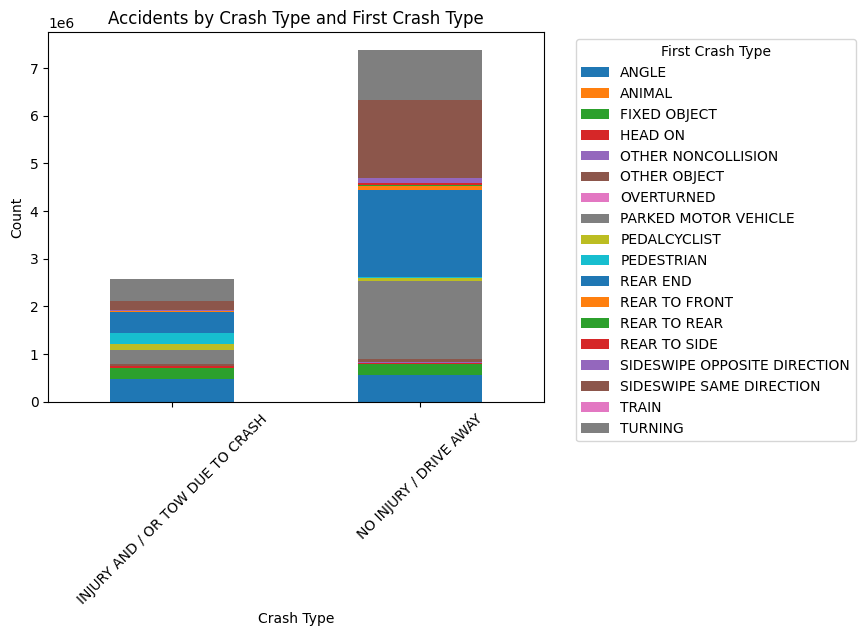



*   بالنسبة لفئة "إصابة بسبب الحادث"، أكثر أنواع الاصطدام الأولية شيوعًا هي "الاصطدام الخلفي"، و"الاصطدام الجانبي في نفس الاتجاه"، و"مركبة متوقفة".

*   بالنسبة لفئة "بدون إصابة"، أكثر أنواع الاصطدام الأولية شيوعًا هي "الاصطدام الجانبي في نفس الاتجاه"، و"الاصطدام الخلفي"، و"مركبة متوقفة".
*   أنواع الاصطدام الأولية الأقل شيوعًا، مثل "المشاة" و"دراجة هوائية" و"الاصطدام الأمامي"، لها حضور أصغر عبر كلا فئتي أنواع الحوادث الرئيسيتين.








### [iv] رسم عدد حوادث حسب نوع الطريق وظروف الاضاءة

In [ ]:
crash_counts = crashes_data.groupby(['TRAFFICWAY_TYPE', 'LIGHTING_CONDITION']).size().unstack(fill_value=0)


plt.figure(figsize=(16, 10))
crash_counts.plot(kind='bar', stacked=True)
plt.title('Accidents by Trafficway Type and Lighting Condition')
plt.xlabel('Trafficway Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Lighting Condition', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

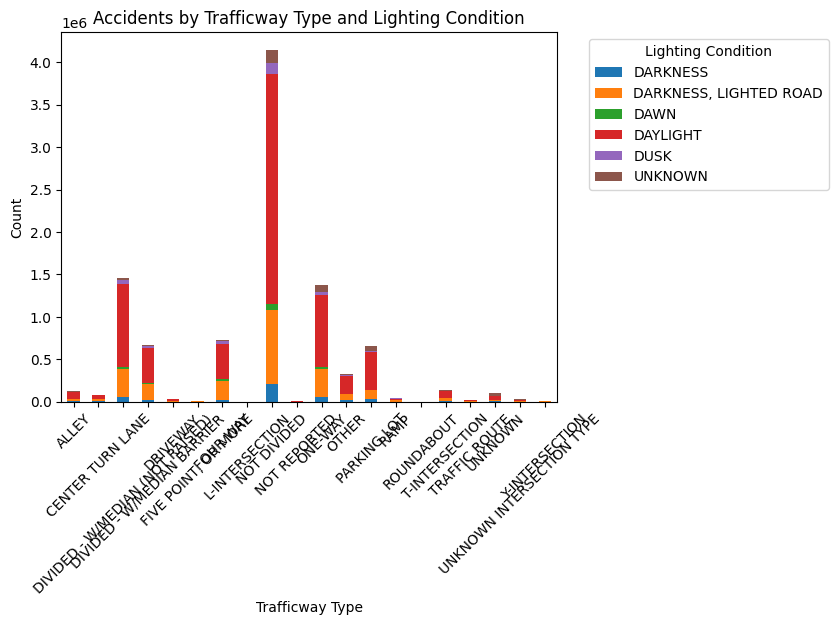



*   أنواع الطرق الأكثر شيوعًا للحوادث هي "غير مقسمة" و"أحادي الاتجاه" و"مقسمة - بوسيط (ليس مرتفع)".

*   ظروف الإضاءة الأكثر شيوعًا للحوادث هي "النهار" و"الظلام، الطريق مضاء".
*   هناك ارتباط بين أنواع الطرق وظروف الإضاءة مثل، المسارات "غير المقسمة" تشهد عددًا كبيرًا من الحوادث في ظروف "النهار"، بينما تشهد الطرق "المقسمة - بوسيط حاجز" عددًا كبيرًا من الحوادث في ظروف "الظلام، الطريق مضاء".


*   بعض أنواع الطرق مثل "الزقاق" و"الممر الخاص" تظهر عدد قليل من الحوادث بشكل عام.
*   هناك بعض الحوادث التي وقعت في ظروف "مجهولة" لكل من نوع الطريق وظروف الإضاءة.



## [b] Traffic Accidents History


### [i]رسم عدد الحوادث حسب الساعة والفئة الضرر المقدرة من قبل الضابط

In [ ]:
crash_hour_damage = crashes_data.groupby(['CRASH_HOUR', 'DAMAGE']).size().unstack(fill_value=0)


fig, ax = plt.subplots(figsize=(12, 6))
crash_hour_damage.plot(kind='bar', ax=ax)


ax.set_title('Accidents by Crash Hour and Damage Level')
ax.set_xlabel('Crash Hour')
ax.set_ylabel('Number of Accidents')
ax.legend(title='Damage Level')
plt.show()

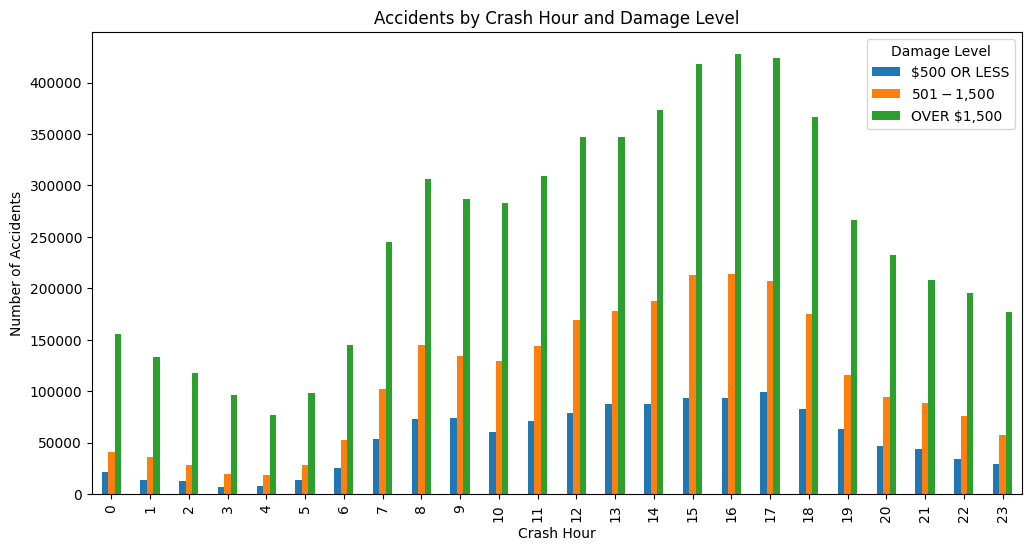

 <div dir="rtl">


*   ساعات الذروة (من 5:00 مساءً إلى 10:00 مساءً) تشهد أكبر عدد من الحوادث المسجلة.

*   معظم الحوادث خلال ساعات الذروة تسبب أضرارًا متوسطة أو كبيرة (501-1,500 دولار أو أكثر من 1,500 دولار).
*  الحوادث التي تقع في ساعات متأخرة من الليل (بعد منتصف الليل) تميل إلى أن تكون أقل ضررًا (500 دولار أو أقل).


*   هناك نمط واضح يشير إلى أن الحوادث التي تقع خلال ساعات الذروة المرورية أكثر خطورة وتسبب أضرارًا أكبر من تلك التي تقع في وقت متأخر من الليل.







  <div>








### [ii]رسمة عدد الحوادث الكلي في شهر من كل سنة

In [ ]:
crash_counts_by_month = crashes_data['CRASH_MONTH'].value_counts()

crash_counts_by_month = crash_counts_by_month.sort_index()


plt.figure(figsize=(12, 6))
plt.plot(range(1, 13), crash_counts_by_month.values)
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.title('Total Number of Crashes per Month Throughout the Year')
plt.show()

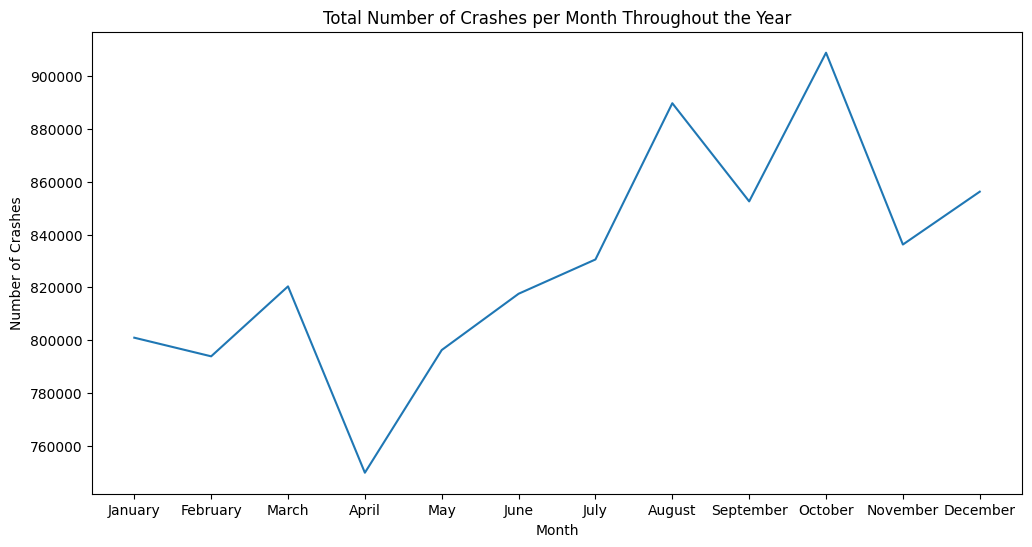






*    أعلى عدد للحوادث في اكتوبر والذي يصل إلى أكثر من 76000 حادث.
*   أقل عدد للحوادث يكون في ابريل وهو اقل من 62000 حادث.







### [iii] توزيع عدد الحوادث الشهرية خلال السنة

In [ ]:
crashes_data.shape

In [ ]:
crashes_data.columns

In [ ]:
crashes_data['CRASH_DATE'].value_counts()

In [ ]:
crashes_data['CRASH_MONTH'].value_counts()

In [ ]:
# Convert the CRASH_DATE column to a datetime object
crashes_data['CRASH_DATE'] = pd.to_datetime(crashes_data['CRASH_DATE'])

# Extract the year and month from the CRASH_DATE column
crashes_data['CRASH_YEAR'] = crashes_data['CRASH_DATE'].dt.year
crashes_data['CRASH_MONTH'] = crashes_data['CRASH_DATE'].dt.month

# Create the interactive box plot
fig = go.Figure()

for year in crashes_data['CRASH_YEAR'].unique():
    year_data = crashes_data[crashes_data['CRASH_YEAR'] == year]
    fig.add_trace(go.Box(
        x=year_data['CRASH_MONTH'],
        y=year_data['INJURIES_TOTAL'],  # Use the 'INJURIES_TOTAL' column
        name=str(year)
    ))

fig.update_layout(
    title='Monthly Distribution of Crashes by Year',
    xaxis_title='Month',
    yaxis_title='Number of Crashes',
    bargap=0.1
)

fig.show()

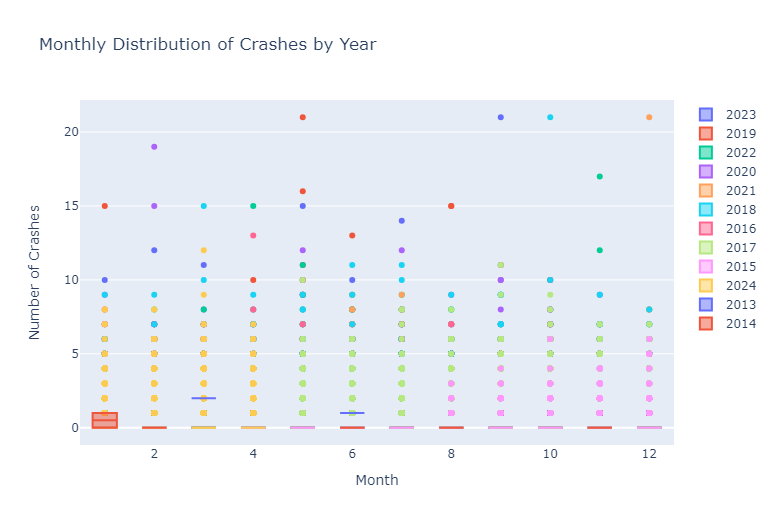

### [iv]رسم عدد الحوادث حسب يوم اسبوع وفئة الضررالمقدر من قبل الضابط

In [ ]:
crashes_data['CRASH_DATE'] = pd.to_datetime(crashes_data['CRASH_DATE'])

# Extract the day of the week from the CRASH_DATE column
crashes_data['CRASH_DAY_OF_WEEK'] = crashes_data['CRASH_DATE'].dt.day_name()

# Group the data by day of the week and damage type
crash_counts = crashes_data.groupby(['CRASH_DAY_OF_WEEK', 'DAMAGE']).size().reset_index(name='counts')

# Create the Sunburst plot
fig = go.Figure(go.Sunburst(
    labels=crash_counts['CRASH_DAY_OF_WEEK'] + ' - ' + crash_counts['DAMAGE'],
    parents=[''] + crash_counts['CRASH_DAY_OF_WEEK'].tolist(),
    values=crash_counts['counts'],
    branchwidth=4,
    marker=dict(
        colors=['#ffcdd2', '#e1bee7', '#c8e6c9', '#b3e5fc', '#f8bbd0', '#d1c4e9', '#b2dfdb'],
        colorscale='Viridis'
    )
))

fig.update_layout(
    title='Crashes by Day of the Week and Damage Type',
    font_size=10
)

fig.show()

## [c] Spatial Analysis


### [i]

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='LOCATION', data=crashes_data)
plt.title('Number of Traffic Accidents by Geographic Sector')
plt.xticks(rotation=90)
plt.show()

### [ii]

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAMAGE', y='DISTANCE_FROM_DOWNTOWN', data=crashes_data)
plt.title('Distance from Downtown by Damage Category')
plt.show()

### [iii]

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='STREET_LENGTH', y='CITY', data=crashes_data)
plt.title('Street Length within the City')
plt.show()

### [iv]

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='STREET_LENGTH_CATEGORY', data=crashes_data)
plt.title('Number of Traffic Accidents by Street Length Category')
plt.show()

### [v]

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DISTANCE_FROM_DOWNTOWN_CATEGORY', data=crashes_data)
plt.title('Number of Traffic Accidents by Distance from Downtown Category')
plt.show()

### [vi]

In [ ]:
contingency_table = pd.crosstab(data['STREET_LENGTH_CATEGORY'], data['DISTANCE_FROM_DOWNTOWN_CATEGORY'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

## [d] Passengers Cases Analysis


### [i] رسمة عمر السائق جنس السائق عمر السيارة

In [ ]:
people_data['SEX'].unique()

In [ ]:
# Merge the data based on common columns
merged_data = pd.merge(people_data, vehicles_data, on='CRASH_RECORD_ID')

# Convert the 'SEX' column to numeric values
merged_data['SEX_NUM'] = merged_data['SEX'].map({'M': 0, 'X': 1})

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(merged_data['AGE'], merged_data['VEHICLE_YEAR'], c=merged_data['SEX_NUM'])
plt.xlabel('Driver Age')
plt.ylabel('Vehicle Year')
plt.title('Scatter Plot of Driver Age, Vehicle Year, and Driver Gender')
plt.colorbar(label='Gender')
plt.grid()
plt.show()

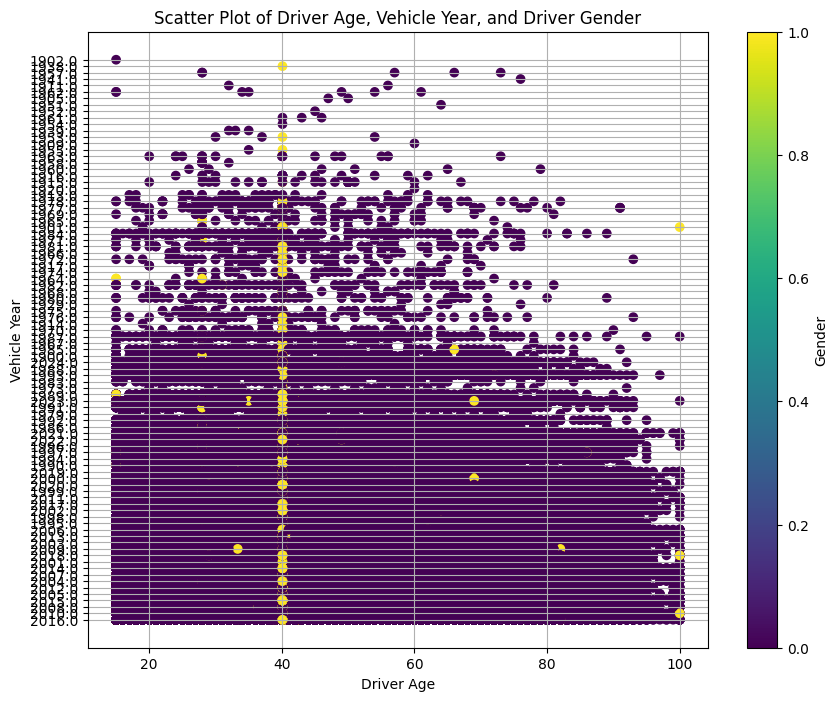

تتجمع معظم النقاط في الجزء السفلي الأيمن من المخطط، مما يشير إلى أن معظم السائقين هم من متوسطي العمر ويقودون سيارات حديثة نسبيًا.


هناك بعض البيانات المتطرفة، مع وجود بعض النقاط التي تمثل سائقين كبار السن وسيارات قديمة، وكذلك بعض السائقين الأصغر سنًا وسيارات حديثة.


توزيع الجنس يُظهر فصلاً واضحًا، حيث تشغل النقاط الصفراء والبنفسجية مناطق مختلفة من المخطط، مما يُشير إلى وجود علاقة بين عمر السائق وسنة السيارة والجنس.

### [ii]ChiSquareAnalysis

 وجدت أن هناك علاقة بين فئة عمر السائق وفئة عمر السيارة. أظهرت الخريطة أن معظم القيم تركزت على فئة عمر السائق من العشرين إلى المائة، بينما هناك بعض البيانات حتى عمر 100 سنة.

هذا يشير إلى أن هناك علاقة بين عمر السيارة وعمر السائق. لمعرفة ذلك بشكل أكثر دقة، أقترح استخدام تحليل مربع كاي الديناميكي (Chi-Square Analysis) للتحقق إحصائياً من العلاقة بين عمر السيارة وفئة عمر السائق.

هذا التحليل الإحصائي سيساعدنا في فهم مدى وجود علاقة ذات دلالة إحصائية بين هذين المتغيرين

### [iii]متوسط عمر الركاب باستثناء الركاب

In [ ]:
passenger_ages = people_data.loc[people_data['PERSON_TYPE'] != 'Driver', 'AGE']

fig = go.Figure()
fig.add_trace(go.Box(x=passenger_ages, name='Passenger Ages'))
fig.update_layout(
    title='Distribution of Passenger Ages',
    xaxis_title='Age',
    yaxis_title='Frequency',
    bargap=0.1
)
fig.show()

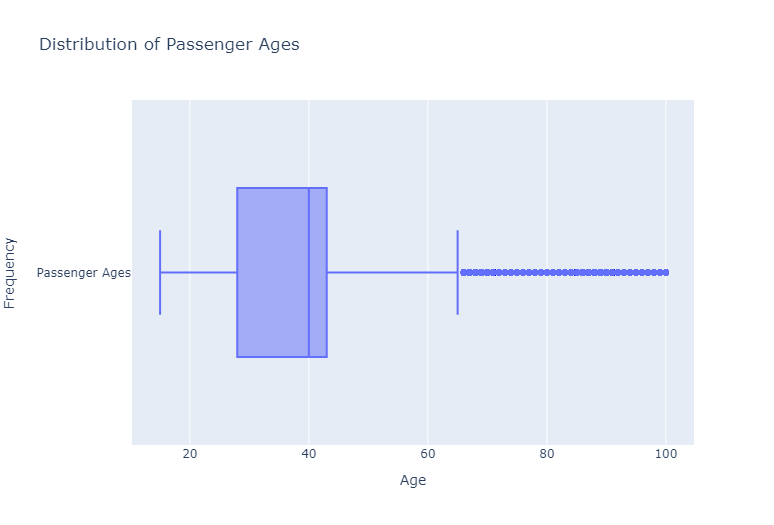



*   القيم المتطرفة أو القيم الشاذة في كل من نهايتي الأعمار الأصغر والأكبر،

*   وجود عدد أقل من الركاب في مجموعات الأعمار الصغيرة جدًا (أقل من 20 عامًا) والكبيرة جدًا (أكثر من 80 عامًا).



### [iv]عمر الركاب باستثناء السائق

In [ ]:

num_passengers = people_data.loc[people_data['PERSON_TYPE'] != 'Driver', 'PERSON_ID'].value_counts()
fig = go.Figure()
fig.add_trace(go.Box(y=num_passengers))
fig.update_layout(
    title='Distribution of Number of Passengers',
    xaxis_title='Number of Passengers',
    yaxis_title='Frequency'
)
fig.show()

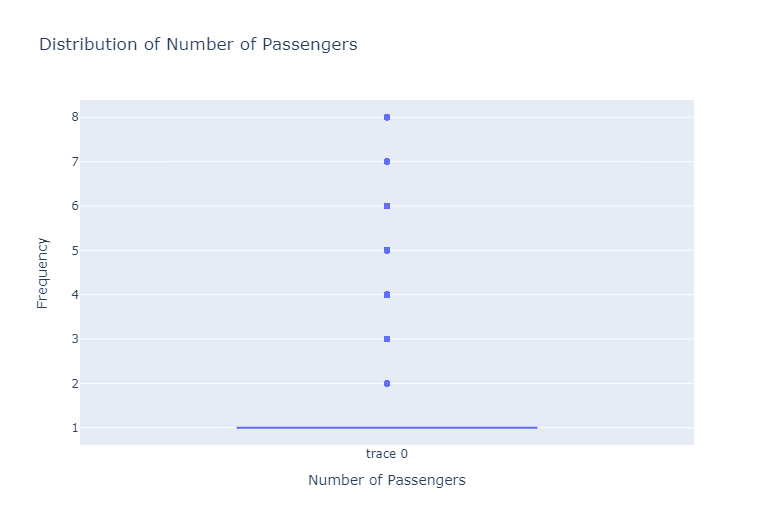

الحد الأقصى لعدد الركاب هو 8.

هناك قيم للربيعي الأعلى، الوسيط، الربيعي الأدنى، والحد الأدنى لعدد الركاب.


توزيع عدد الركاب ليس متناظرًا، حيث يظهر وجود بعض القيم المتطرفة.

### [v]

## [e] Outlier Detection

### [i]

# Question [4]: Do What you Have to Do